# Revealing Ferroelectric Switching Character Using Deep Recurrent Neural Networks

Joshua C. Agar<sup>1,2,3*</sup>, Brett Naul<sup>4</sup>, Shishir Pandya<sup>1</sup>, Stefan van der Walt<sup>5</sup>, Joshua Maher<sup>1</sup>, Ren Yao<sup>6</sup>, Long-Qing Chen<sup>7</sup>, Sergei V. Kalinin<sup>8</sup>, Rama K. Vasudevan<sup>8</sup>, Ye Cao<sup>6</sup>, Joshua S. Bloom<sup>4</sup>, and Lane W. Martin<sup>1,2*</sup>

<sup>1</sup> 	Department of Materials Science and Engineering, University of California, Berkeley, Berkeley, CA 94720, USA  
<sup>2</sup> 	Materials Sciences Division, Lawrence Berkeley National Laboratory, Berkeley, CA 94720, USA  
<sup>3</sup> 	Department of Materials Science and Engineering, Lehigh University, Bethlehem, PA 18015, USA  
<sup>4</sup> 	Department of Astronomy, University of California, Berkeley, Berkeley, CA 94720, USA  
<sup>5</sup>	Berkeley Institute of Data Science, University of California, Berkeley, Berkeley, CA 94720, USA  
<sup>6</sup> 	Department of Materials Science and Engineering, University Texas at Arlington, Arlington, TX 76019, USA  
<sup>7</sup> 	Department of Materials Science and Engineering and Materials Research Institute, The Pennsylvania State University, University Park, PA 16802-5006, USA  
<sup>8</sup> 	Center for Nanophase Materials Sciences, Oak Ridge National Laboratory, Oak Ridge, TN 37830, USA  
*joshua.agar@lehigh.edu, lwmartin@berkeley.edu

Keywords: ferroelectric, switching, domains, scanning-probe microscopy, neural network

# Table of Contents
* [Revealing Ferroelectric Switching Character Using Deep Recurrent Neural Networks](#Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks)
* [Importing Packages](#Importing-Packages)
	* [Settings](#Settings)
		* [Export Figure Settings](#Export-Figure-Settings)
		* [Plotting Format](#Plotting-Format)
* [Folders](#Folders)
* [Loads the Data](#Loads-the-Data)
	* [Cleans the Raw Data](#Cleans-the-Raw-Data)
	* [Visualize Cleaned Data](#Visualize-Cleaned-Data)
* [Structural Characterization](#Structural-Characterization)
	* [Topography and Piezoresponse](#Topography-and-Piezoresponse)
	* [Reciprical Space Maps of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with Hierarchical Domain Structures](#Reciprical-Space-Maps-of-PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$-with-Hierarchical-Domain-Structures)
	* [Initial PFM images](#Initial-PFM-images)
	* [Final PFM Images](#Final-PFM-Images)
* [Band Excitation Piezoresponse Force Microscopy - Basic Analysis](#Band-Excitation-Piezoresponse-Force-Microscopy---Basic-Analysis)
	* [Exports all images](#Exports-all-images)
	* [Export Images for Movie](#Export-Images-for-Movie)
	* [Plot Raw Band Excitation Spectra](#Plot-Raw-Band-Excitation-Spectra)
	* [Loop Fitting Results](#Loop-Fitting-Results)
* [Classical Machine Learning Approaches](#Classical-Machine-Learning-Approaches)
	* [Principal Component Analysis](#Principal-Component-Analysis)
		* [Piezoresponse](#Piezoresponse)
		* [Amplitude](#Amplitude)
		* [Phase](#Phase)
		* [Resonance Frequency](#Resonance-Frequency)
		* [Quality Factor](#Quality-Factor)
	* [Non-Negative Matrix Factorization](#Non-Negative-Matrix-Factorization)
		* [Piezoresponse](#Piezoresponse)
		* [Amplitude](#Amplitude)
		* [Phase](#Phase)
		* [Resonance Frequency](#Resonance-Frequency)
		* [Quality Factor](#Quality-Factor)
	* [Clustering](#Clustering)
		* [Piezoresponse](#Piezoresponse)
		* [Amplitude](#Amplitude)
		* [Phase](#Phase)
		* [Resonance Frequency](#Resonance-Frequency)
		* [Quality Factor](#Quality-Factor)
	* [PCA + Clustering](#PCA-+-Clustering)
		* [Piezoresponse](#Piezoresponse)
		* [Amplitude](#Amplitude)
		* [Phase](#Phase)
		* [Resonance](#Resonance)
		* [Quality Factor](#Quality-Factor)
* [Deep Learning Long Short-Term Memory Reccurent Neural Network Autoencoder](#Deep-Learning-Long-Short-Term-Memory-Reccurent-Neural-Network-Autoencoder)
	* [Piezoresponse](#Piezoresponse)
		* [Building the model](#Building-the-model)
		* [Train the model](#Train-the-model)
		* [Loads Pre-Trained Model](#Loads-Pre-Trained-Model)
	* [Model Validation](#Model-Validation)
		* [Validation Loss](#Validation-Loss)
		* [Training Results](#Training-Results)
		* [Low Dimensional Layer](#Low-Dimensional-Layer)
		* [Plot Embedding and Line Trace](#Plot-Embedding-and-Line-Trace)
		* [Exports Training Images](#Exports-Training-Images)
		* [Make Generator Movie](#Make-Generator-Movie)
		* [Plots Generator Results](#Plots-Generator-Results)
	* [Resonance](#Resonance)
		* [Building the model](#Building-the-model)
		* [Train the model](#Train-the-model)
		* [Loads Pre-Trained Model](#Loads-Pre-Trained-Model)
	* [Model Validation](#Model-Validation)
		* [Validation Loss](#Validation-Loss)
		* [Plot Embedding and Line Trace](#Plot-Embedding-and-Line-Trace)
		* [Exports Training Images](#Exports-Training-Images)
		* [Make Generator Movie](#Make-Generator-Movie)
		* [Autoencoder Generator](#Autoencoder-Generator)
* [Phase Field](#Phase-Field)


# Importing Packages

In [ ]:
!pip install -U moviepy keras tensorflow natsort tqdm scikit_image scikit_learn scipy

In [1]:
# imports useful packages
import warnings
warnings.filterwarnings('ignore')
import imp
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import codes.analysis.rnn as rnn
import codes.util as util
import codes.analysis.machine_learning as ml
import codes.analysis as an
import codes.processing as p
import codes.viz as viz
import codes.util.input_output as io_transfer
from sklearn.decomposition import NMF
from scipy import io
import numpy as np
import os
import os.path

# loads the custom graphing format
viz.format.custom_plt_format()

Using TensorFlow backend.
W0904 11:19:05.843557 4662195648 __init__.py:914] Illegal line #25
	"plt.style.use('./custom.mplstyle')"
	in file "./custom.mplstyle"


# Folders

In [2]:
# builds folders where the data will be saved
folder_structure = util.file.make_folder(
    './structure')
folder_BE = util.file.make_folder(
    './Band_Excitation')
folder_BE_Movie_files = util.file.make_folder(
    folder_BE + '/BE_Movie_Files')
folder_BE_all_images = util.file.make_folder(
    folder_BE + '/BE_all_images')
folder_BE_spectra = util.file.make_folder(
    folder_BE + '/BE_spectra')
folder_BE_cleaned_spectra = util.file.make_folder(
    folder_BE + '/cleaned_spectra')
folder_pca = util.file.make_folder(
    './pca')
folder_nmf = util.file.make_folder(
    './nmf')
folder_clustering = util.file.make_folder('./clustering')
folder_pca_clustering = util.file.make_folder(
    './pca_clustering')
folder_piezoresponse_autoencoder = util.file.make_folder(
    './piezoresponse_autoencoder')
folder_resonance_autoencoder = util.file.make_folder(
    './resonance_autoencoder')
folder_piezoresponse_autoencoder_movie = util.file.make_folder(
    folder_piezoresponse_autoencoder + '/movie')
folder_piezoresponse_autoencoder_training_movie = util.file.make_folder(
    folder_piezoresponse_autoencoder + '/training_movie')
folder_resonance_autoencoder_movie = util.file.make_folder(
    folder_resonance_autoencoder + '/movie')
folder_resonance_autoencoder_training_movie = util.file.make_folder(
    folder_resonance_autoencoder + '/training_movie')
folder_phase_field = util.file.make_folder(
    './Phase_Field')

# Download Data

In [3]:
# Downloading data for Phase Field simulations and full training data
# note these are big files >50 gb
download_data = False

url = 'https://zenodo.org/record/1482091/files/Phase_field.zip?download=1'
filename = 'phase_field.zip'
save_path = './Raw_Data/Phase_Field/'

io_transfer.download_and_unzip(filename, url, save_path, download_data)

url = 'https://zenodo.org/record/1482091/files/Trained_models.zip?download=1'
filename = 'train_model_zip.zip'
save_path = './Trained Models/'

io_transfer.download_and_unzip(filename, url, save_path, download_data)

Using zip file already available
extracting phase_field.zip to ./Raw_Data/Phase_Field/


BadZipFile: File is not a zip file

## Settings

### Export Figure Settings

In [4]:
# Sets what object to export
printing = {  # exports eps vector graphics (note these files can be large)
    'EPS': True,
    # exports png files
    'PNG': True,
    # prints image series (note this can take some time)
    'all_figures': False,
    # generates movies (note this can take some time)
    'movies': False,
    # resolution of the images
    'dpi': 300}

### Plotting Format

In [5]:
# sets the plotting format
plot_format = {
    # adds scalebar to image
    'add_scalebar': True,
    # sets the dimensions for the scalebar [(size of image),(size of scalebar)]
    'scalebar': [2000, 500],
    # selects if the image will be rotated
    'rotation': True,
    # selects the rotation angle of the image
    'angle': 60.46,
    # sets the fraction of the image to crop
    'frac_rm': 0.17765042979942694,
    # sets the resolution of the image
    'dpi': 300,
    # sets the default colormap
    'color_map': 'viridis',
    # sets if color bars should be added
    'color_bars': True}

# Loads the Data

In [6]:
# imports the raw band excitation data
imported = {'data': io.matlab.loadmat('./Raw_Data/Data.mat'),
            'validation_data': io.matlab.loadmat('Raw_Data/loop_1.mat')}

# extracts the important information from the raw data
raw = {'voltage': imported['data']['Voltagedata_mixed'],
       'piezoresponse': imported['data']['Loopdata_mixed'],
       'amplitude': imported['data']['OutA2_mixed'],
       'phase': imported['data']['OutPhi1_mixed'],
       'resonance': imported['data']['Outw2_mixed'],
       'quality_factor': imported['data']['OutQ2_mixed'],
       'val_piezoresponse': imported['validation_data']['piezo_1'],
       'val_resonance': imported['validation_data']['resonance_loop_1']}

## Cleans the Raw Data

In [7]:
# adds a max min filter on the data to remove bad points
p.filters.range_filter(raw['resonance'], [1300, 1340])
p.filters.range_filter(raw['val_resonance'], [1300, 1340])

# interpolates data that is non-real. This happens when the SHO fit fails
interpolated = {'voltage': raw['voltage'],
                'piezoresponse': p.filters.clean_interpolate(raw['piezoresponse'],
                                                             'linear').reshape(-1, raw['piezoresponse'].shape[2]),
                'amplitude': p.filters.clean_interpolate(raw['amplitude'],
                                                         'linear').reshape(-1, raw['amplitude'].shape[2]),
                'phase': p.filters.clean_interpolate(raw['phase'],
                                                     'linear').reshape(-1, raw['phase'].shape[2]),
                'resonance': p.filters.clean_interpolate(raw['resonance'],
                                                         'linear').reshape(-1, raw['resonance'].shape[2]),
                'quality_factor': p.filters.clean_interpolate(raw['quality_factor'],
                                                              'linear').reshape(-1, raw['quality_factor'].shape[2]),
                'val_piezoresponse': p.filters.clean_interpolate(raw['val_piezoresponse'],
                                                                  'linear').reshape(-1, raw['val_piezoresponse'].shape[2]),
                'val_resonance': p.filters.clean_interpolate(raw['val_resonance'],
                                                             'linear').reshape(-1, raw['val_resonance'].shape[2])}
# Uses Savitzky-Golay filter to remove outlier points
sg_filtered = {'voltage': raw['voltage'],
               'piezoresponse': p.filters.savgol(interpolated['piezoresponse'], fit_type='linear'),
               'amplitude': p.filters.savgol(interpolated['amplitude'], fit_type='linear'),
               'phase': p.filters.savgol(interpolated['phase'], fit_type='linear'),
               'resonance': p.filters.savgol(interpolated['resonance'], fit_type='linear'),
               'quality_factor': p.filters.savgol(interpolated['quality_factor'], fit_type='linear'),
               'val_piezoresponse': p.filters.savgol(interpolated['val_piezoresponse'], fit_type='linear'),
               'val_resonance': p.filters.savgol(interpolated['val_resonance'], fit_type='linear')}

# normalized the data. This is important for training Neural Networks
normalized = {'voltage': raw['voltage'],
              'piezoresponse': p.filters.normalize(sg_filtered['piezoresponse']),
              'amplitude': p.filters.normalize(sg_filtered['amplitude']),
              'phase': p.filters.normalize(sg_filtered['phase']),
              'resonance': p.filters.normalize(sg_filtered['resonance']),
              'quality_factor': p.filters.normalize(sg_filtered['quality_factor']),
              'val_piezoresponse': p.filters.normalize(sg_filtered['val_piezoresponse'],
                                                       sg_filtered['piezoresponse']),
              'val_resonance': p.filters.normalize(sg_filtered['val_resonance'],
                                                   sg_filtered['resonance'])}

# stores information which helps in making pretty axes.
signal_info = {'voltage': dict(
    symbol='voltage',
    format_str='%3.d',
    units='Voltage (V)',
    y_lim=None,
    x_tick=np.linspace(-15, 15, 7),
    pca_range=None),
    'amplitude': dict(
    symbol='A',
    format_str='%.0e',
    units='Amplitude (Arb. U.)',
    y_lim=None,
    y_tick=[],
    pca_range=None),
    'phase': dict(
    symbol='Phi',
    format_str='%3.d',
    units='Phase (${^\circ}$)',
    y_lim=[-110, 110],
    y_tick=np.linspace(-90, 90, 5),
    pca_range=None),
    'resonance': dict(
    symbol='w',
    format_str='%3.d',
    units='Resonance (kHz)',
    y_lim=[1326, 1329],
    y_tick=np.linspace(1320, 1329, 4),
    pca_range=None),
    'quality_factor': dict(
    symbol='Q',
    format_str='%3.f',
    units='Quality Factor (Arb. U.)',
    y_lim=[210, 310],
    y_tick=np.linspace(215, 310, 5),
    pca_range=None),
    'piezoresponse': dict(
    symbol='Piezoresponse',
    format_str='%.0e',
    units='Piezoresponse (Arb. U.)',
    y_lim=None,
    y_tick=[],
    pca_range=[-0.29, .29])
}

# builds a single dictonary to hold all the data
data = {'raw': raw,
        'interpolated': interpolated,
        'sg_filtered': sg_filtered,
        'normalized': normalized,
        'signal_info': signal_info}

## Visualize Cleaned Data

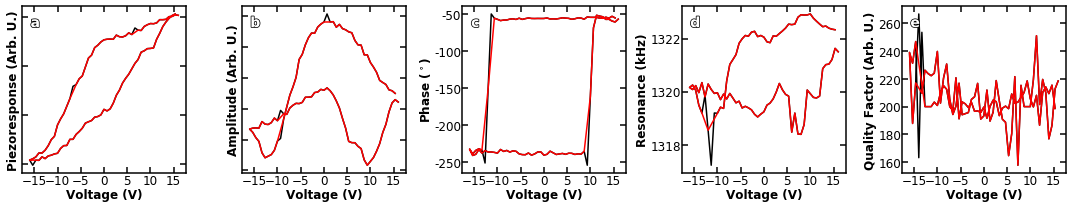

In [8]:
# Selects a random index to plot
#i = np.random.randint(3600)
# if user wants to show a specific point
i = 100

# Plots the raws data (black) and cleaned data (red)
viz.plot.cleaned_data(data, i, printing, folder_BE_cleaned_spectra)

<div class="cite2c-biblio"></div><div class="cite2c-biblio"></div><div class="cite2c-biblio"></div>**Figure J1 | Images showing preprocessing of data. a,** Piezoresponse **b,** amplitude **c,** phase **d,** resonance frequency **e,** quality factor. Raw data is shown in black, processed data shown in red.

# Structural Characterization

##  Topography and Piezoresponse

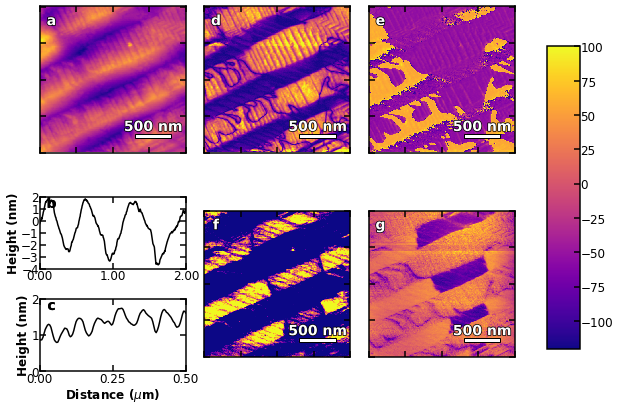

In [9]:
# Description and properties of the plots
signals = {'Topography': dict(
    c_lim=[],
    data_loc='topo_mixed'),
    'Large-Periodicity Line Trace': dict(
    data_loc='topo_ca_caca_mixed',
    x_lim=[0, 2],
    y_lim=[-4, 2],
    shift=0),
    'Small-Periodicity Line Trace':  dict(
    data_loc='topo_mixed_caca',
    x_lim=[0, .5],
    y_lim=[0, 2],
    shift=0.8),
    'Vertical Amplitude': dict(
    c_lim=[0, 4.5e-10],
    data_loc='Vert_Amp_mixed'),
    'Vertical Phase': dict(
    c_lim=[],
    data_loc='vert_phase_mixed'),
    'Lateral Amplitude': dict(
    c_lim=[0, .8e-11],
    data_loc='lateral_amp_mixed'),
    'Lateral Phase': dict(
    c_lim=[],
    data_loc='lateral_phase_mixed')
}

# plots the PFM images and line traces across those images.
viz.plot.pfm_w_line_trace(signals, imported, printing, folder_structure, colorbar_shown=True, )

**Figure J2 | Piezoresponse force microscopy images of 400 nm thick PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ heterostructures supported on NdScO${_3}$ (110). a,** Topography **b,** Line trace indicating the large scale sawtooth-like topography between the *c/*a/*c/*a and *a${_1}$/*a${_2}$/*a${_1}$/*a${_2}$ domain regions. **c,** Line trace indicating the small scale sawtooth-like topography within the c/a/c/a domain bands. Images of piezoresponse vertical **d,** amplitude and **e,** phase and lateral **f,** amplitude and **g,** phase.

## Reciprical Space Maps of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with Hierarchical Domain Structures

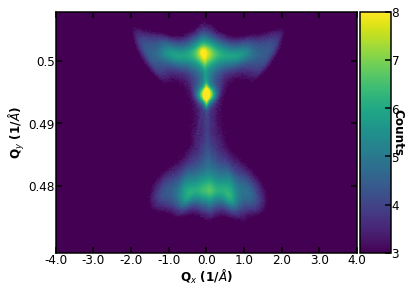

In [10]:
viz.plot.rsm(imported, printing, folder_structure, plot_format)

**Figure J3 |** Symmetric reciprocal space map of 400 nm thick PbZr${_{0.8}}$Ti${_{0.2}}$O${_{3}}$ heterostructures supported on NdScO${_3}$ (110). Map obtained around the substrate 220 diffraction condition.

## Initial PFM images

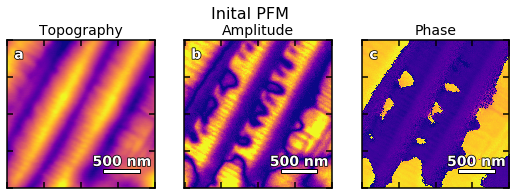

In [11]:
# (User) Sets the colorscale of [topography = (initial [-3e-9,3e-9]),
#amplitude (initial [.5e-11,6.5e-11]),
# phase (initial [40,260])]
signals = {'Topography': dict(
    c_lim=[-3e-9, 3e-9],
    data_loc='HeightOriginal'),
    'Amplitude': dict(
    c_lim=[.5e-11, 6.5e-11],
    data_loc='AmpOriginal'),
    'Phase': dict(
    c_lim=[40, 260],
    data_loc='PhaseOriginal')
}

viz.plot.pfm(signals, imported, printing, folder_structure, 'Inital PFM')

**Figure J4 | Piezoresponse force microscopy images prior to band excitation piezoresponse force microscopy switching.** **a,** topographic and **b,** vertical **c,** phase piezoresponse force microscopy images of as grown 400 nm thick PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ heterostructure supported on NdScO${_{3}}$ (110). 

## Final PFM Images

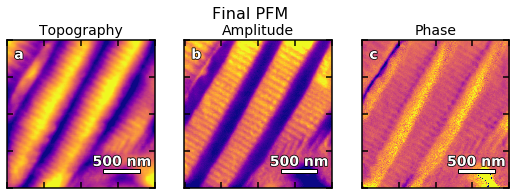

In [12]:
# (User) Sets the colorscale of [topography = (initial [-3e-9,3e-9]),
#amplitude (initial [.2e-10,1.5e-10]),
# phase (initial [50,90])]
signals = {'Topography': dict(
    c_lim=[-2e-9, 2e-9],
    data_loc='HeightFinal'),
    'Amplitude': dict(
    c_lim=[.2e-10, 1.5e-10],
    data_loc='AmpFinal'),
    'Phase': dict(
    c_lim=[50, 90],
    data_loc='PhaseFinal')
}

viz.plot.pfm(signals, imported, printing, folder_structure, 'Final PFM')

**Figure J5 | Piezoresponse force microscopy images following band excitation piezoresponse force microscopy switching.** **a,** topographic and **b,** vertical **c,** phase piezoresponse force microscopy images of as grown 400 nm thick PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ heterostructure supported on NdScO${_{3}}$ (110). 

# Band Excitation Piezoresponse Force Microscopy - Basic Analysis

## Exports all images

In [13]:
# Checks if user selected to export all figures
if printing['all_figures']:

    # (User) Sets the colorscale {Initial Amplitude = [0.0020e-3, 0.1490e-3]; Phase = [-265,-30];
    #                                     Resonance = [1317,1330]; Quality Factor = [175,270]}
    signal_clim = {('Amplitude', 'A'): [0.0020e-3, 0.1490e-3],
                   ('Phase', 'Phi'): [-265, -30],
                   ('Resonance', 'w'): [1317, 1330],
                   ('Quality Factor', 'Q'): [175, 270],
                   }

    # prints all images from the switching studies
    viz.plot.band_excitation(imported['data'], signal_clim, plot_format, printing,
                             folder_=folder_BE_all_images)

## Export Images for Movie

In [14]:
if printing['movies']:
    # (User) Sets the colorscale {Initial Amplitude = [0.0020e-3, 0.1490e-3]; Phase = [-265,-30];
    #                                     Resonance = [1317,1330]; Quality Factor = [175,270]}
    signal_clim = {('Amplitude', 'A', '%.0e'): [0.0020e-3, 0.1490e-3],
                   ('Phase', 'Phi', '%.0d'): [-265, -30],
                   ('Resonance', 'w', '%.0d'): [1317, 1330],
                   ('Quality Factor', 'Q', '%.0d'): [175, 270],
                   }

    # creates the images used to make the movie of the switching studies
    viz.plot.band_excitation_movie(imported, signal_clim, 
                                    plot_format, printing, folder = folder_BE_Movie_files)

In [15]:
# creates the movie of the switching studies
if printing['movies']:
    util.file.make_movie('BE_Switching', folder_BE_Movie_files, folder_BE, 'png',
                         4, output_format='mp4')

## Plot Raw Band Excitation Spectra

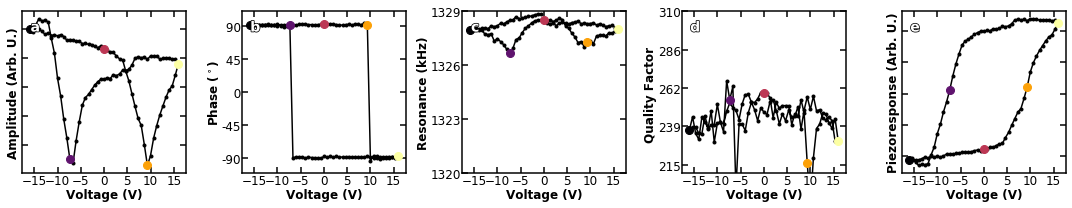

In [16]:
# (User) selects index (index used in main manuscript as example [30,30], cycle 2)
x = 30
y = 30
cycle = 2

# Sets the information for plotting. (User) can adjust scales.
signal_clim = {'Amplitude': dict(
    symbol='A',
    format_str='%.0e',
    units='(Arb. U.)',
    y_lim=[],
    y_tick=[]),
    'Phase': dict(
    symbol='Phi',
    format_str='%3.d',
    units='(${^\circ}$)',
    y_lim=[-110, 110],
    y_tick=np.linspace(-90, 90, 5)),
    'Resonance': dict(
    symbol='w',
    format_str='%3.d',
    units='(kHz)',
    y_lim=[1326, 1329],
    y_tick=np.linspace(1320, 1329, 4)),
    'Quality Factor': dict(
    symbol='Q',
    format_str='%3.f',
    units='',
    y_lim=[210, 310],
    y_tick=np.linspace(215, 310, 5)),
    'Piezoresponse': dict(
    symbol='Piezoresponse',
    format_str='%.0e',
    units='(Arb. U.)',
    y_lim=[],
    y_tick=[])
}

# plots the raw BE spectra
viz.plot.band_excitation_spectra(x, y, cycle, imported['data'],
                                 signal_clim, printing, folder_BE_spectra)

**Figure J6 |** Example raw piezoresponse loops acquired during band excitation piezoresponse spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures. Showing **a,** amplitude, **b,** phase, **c,** resonance, **d,** quality factor, and **e,** piezoresponse (Acos${\phi}$) loop.

## Loop Fitting Results

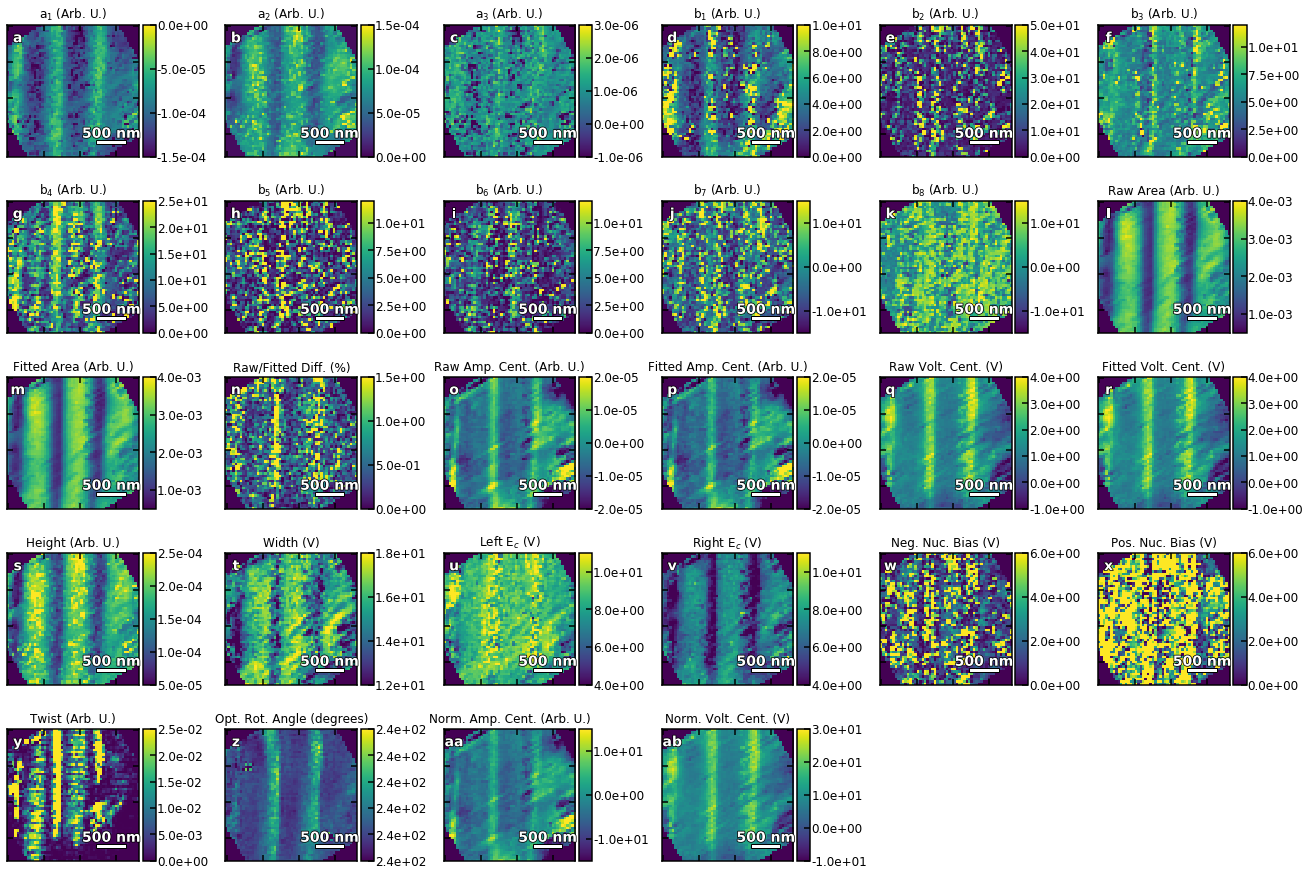

In [78]:
# Sets the information for plotting. (User) can adjust scales.
signal_clim = {'a1': dict(
    label='a${_1}$ (Arb. U.)',
    data_loc='a1_mixed',
    format_str='%.1e',
    c_lim=[-1.5e-4, 0]),
    'a2': dict(
    label='a${_2}$ (Arb. U.)',
    data_loc='a2_mixed',
    format_str='%.1e',
    c_lim=[0, 1.5e-4]),
    'a3': dict(
    label='a${_3}$ (Arb. U.)',
    data_loc='a3_mixed',
    format_str='%.1e',
    c_lim=[-1e-6, 3e-6]),
    'b1': dict(
    label='b${_1}$ (Arb. U.)',
    data_loc='b1_mixed',
    format_str='%.1f',
    c_lim=[0, 10]),
    'b2': dict(
    label='b${_2}$ (Arb. U.)',
    data_loc='b2_mixed',
    format_str='%.1f',
    c_lim=[0, 50]),
    'b3': dict(
    label='b${_3}$ (Arb. U.)',
    data_loc='b3_mixed',
    format_str='%.1f',
    c_lim=[0, 12]),
    'b4': dict(
    label='b${_4}$ (Arb. U.)',
    data_loc='b4_mixed',
    format_str='%.1f',
    c_lim=[0, 25]),
    'b5': dict(
    label='b${_5}$ (Arb. U.)',
    data_loc='b5_mixed',
    format_str='%.1f',
    c_lim=[0, 12]),
    'b6': dict(
    label='b${_6}$ (Arb. U.)',
    data_loc='b6_mixed',
    format_str='%.1f',
    c_lim=[0, 12]),
    'b7': dict(
    label='b${_7}$ (Arb. U.)',
    data_loc='b7_mixed',
    format_str='%.1f',
    c_lim=[-15, 15]),
    'b8': dict(
    label='b${_8}$ (Arb. U.)',
    data_loc='b8_mixed',
    format_str='%.1f',
    c_lim=[-15, 15]),
    'Loop Area': dict(
    label='Raw Area (Arb. U.)',
    data_loc='Acosarea_mixed',
    format_str='%.1e',
    c_lim=[5e-4, 4e-3]),
    'Fitted Loop Area': dict(
    label='Fitted Area (Arb. U.)',
    data_loc='Acosareafit_mixed',
    format_str='%.1e',
    c_lim=[5e-4, 4e-3]),
    'Raw/Fitted Loop Difference': dict(
    label='Raw/Fitted Diff. (%)',
    data_loc='Acosareadif_mixed',
    format_str='%.1e',
    c_lim=[0, 1.5]),
    'Raw Amplitude Centroid ': dict(
    label='Raw Amp. Cent. (Arb. U.)',
    data_loc='AcoscentAc_mixed',
    format_str='%.1e',
    c_lim=[-2e-5, 2e-5]),
    'Fitted Amplitude Centroid': dict(
    label='Fitted Amp. Cent. (Arb. U.)',
    data_loc='AcoscentAcfit_mixed',
    format_str='%.1e',
    c_lim=[-2e-5, 2e-5]),
    'Raw Voltage Centroid': dict(
    label='Raw Volt. Cent. (V)',
    data_loc='AcoscentV_mixed',
    format_str='%.1f',
    c_lim=[-1, 4]),
    'Fitted Voltage Centroid': dict(
    label='Fitted Volt. Cent. (V)',
    data_loc='AcoscentVfit_mixed',
    format_str='%.1f',
    c_lim=[-1, 4]),
    'Loop Height': dict(
    label='Height (Arb. U.)',
    data_loc='Acosheight_mixed',
    format_str='%.1e',
    c_lim=[5e-5, 2.5e-4]),
    'Loop Width': dict(
    label='Width (V)',
    data_loc='Acoswidth_mixed',
    format_str='%.1f',
    c_lim=[12, 18]),
    'Left Coercive field': dict(
    label='Left E${_c}$ (V)',
    data_loc='Al_mixed',
    format_str='%.1f',
    c_lim=[4, 11]),
    'Right Coercive field': dict(
    label='Right E${_c}$ (V)',
    data_loc='Au_mixed',
    format_str='%.1f',
    c_lim=[4, 11]),
    'Negative Nucleation Bias': dict(
    label='Neg. Nuc. Bias (V)',
    data_loc='Acosnegnuc_mixed',
    format_str='%.1f',
    c_lim=[0, 6]),
    'Positive Nucleation Bias': dict(
    label='Pos. Nuc. Bias (V)',
    data_loc='Acosposnuc_mixed',
    format_str='%.1f',
    c_lim=[0, 6]),
    'Loop Twist': dict(
    label='Twist (Arb. U.)',
    data_loc='Acostwist_mixed',
    format_str='%.1e',
    c_lim=[0, 2.5e-2]),
    'Optimum Rotation Angle': dict(
    label='Opt. Rot. Angle (degrees)',
    data_loc='optrotang_mixed',
    format_str='%.1f',
    c_lim=[235, 240]),
    'Normalized Amplitude Centroid': dict(
    label='Norm. Amp. Cent. (Arb. U.)',
    data_loc='NormAcCent_mixed',
    format_str='%.1f',
    c_lim=[-15, 15]),
    'Normalized Voltage Centroid': dict(
    label='Norm. Volt. Cent. (V)',
    data_loc='NormVCent_mixed',
    format_str='%.1f',
    c_lim=[-10, 30])}

viz.plot.loopfits(imported['data'], signal_clim,
                  printing, folder_BE, plot_format)

**Figure J7 |  Spatial maps of loop fitting parameters obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures. a,** a${_1}$ - represents the lowest piezoresponse amplitude. **b,** a${_2}$ - represents the highest piezoresponse value. **c,** a${_3}$ - Loop rotation as defined by tan${\delta}$. **d-g,** b${_{1-4}}$ - parameters specifying the curvature of the loop transitions. **h-i,** b${_{5-6}}$ - parameter specifying the rate of transitions between the curvatures of the loop. **j-k,** b${_{7-8}}$ - parameter specifying the voltage midpoint of the transitions. **l-m,** Raw (fitted) loop area the area enclosed by the raw (fitted) loop, representative of the work of switching. **n,** Area differential, the absolute difference between the area enclosed by the raw and fitted loop. **o-p,**  Raw (fitted) amplitude centroid the center of mass of the amplitude of the raw (fitted) piezoresponse loop. **q-r,**  Raw (fitted) voltage centroid the center of mass of the raw (fitted) piezoresponse loop. **s,** Loop height the vertical height in amplitude of the piezoelectric hysteresis loop. **t,** Loop width in volts. **u-v,** Left/Right E${_c}$ negative/positive piezoelectric coercive fields. **w-x,** Negative/positive nucleation bias, representing the voltage where the piezoresponse has changed by 3% of the loop height. **y,** Loop twist, the twists in shape of the piezoelectric hysteresis loops. **z,** Optimum rotation angle, the optimum ${\phi}$ found which maximizes Acos${\phi}$. **aa-ab,** Loop height (width) normalized amplitude (voltage) centroids. 

# Classical Machine Learning Approaches

## Principal Component Analysis

### Piezoresponse

In [10]:
# creates a dictionary to store the machine learning results
machine_learning = {'pca': dict(),
                    'nmf': dict(),
                    'clustering': dict(),
                    'pca_clustering': dict()}

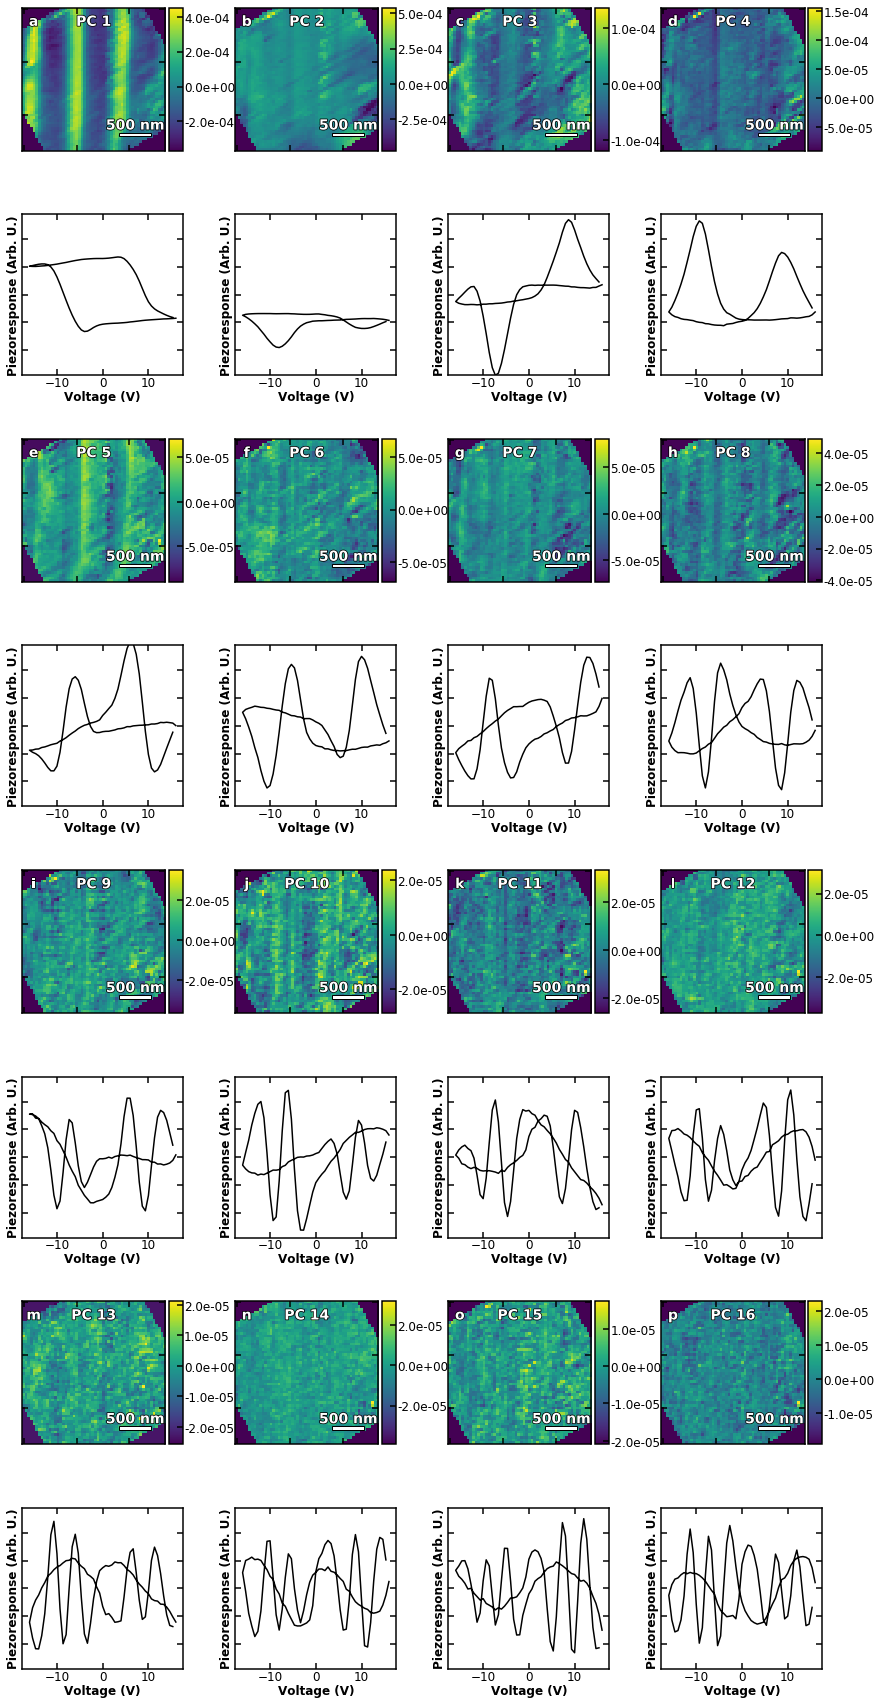

In [11]:
# Computes the PCA
# second index represents the number of components to compute
machine_learning['pca']['piezoresponse'], _ = ml.pca(
    sg_filtered['piezoresponse'], 16)

# Plots the PCA results
viz.plot.pca_results(machine_learning['pca']['piezoresponse'], data,
                     signal_info, printing, folder_pca,
                     plot_format, 'piezoresponse', filename='piezoresponse')

**Figure J9 |  Principal component analysis the piezoresponse obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Amplitude

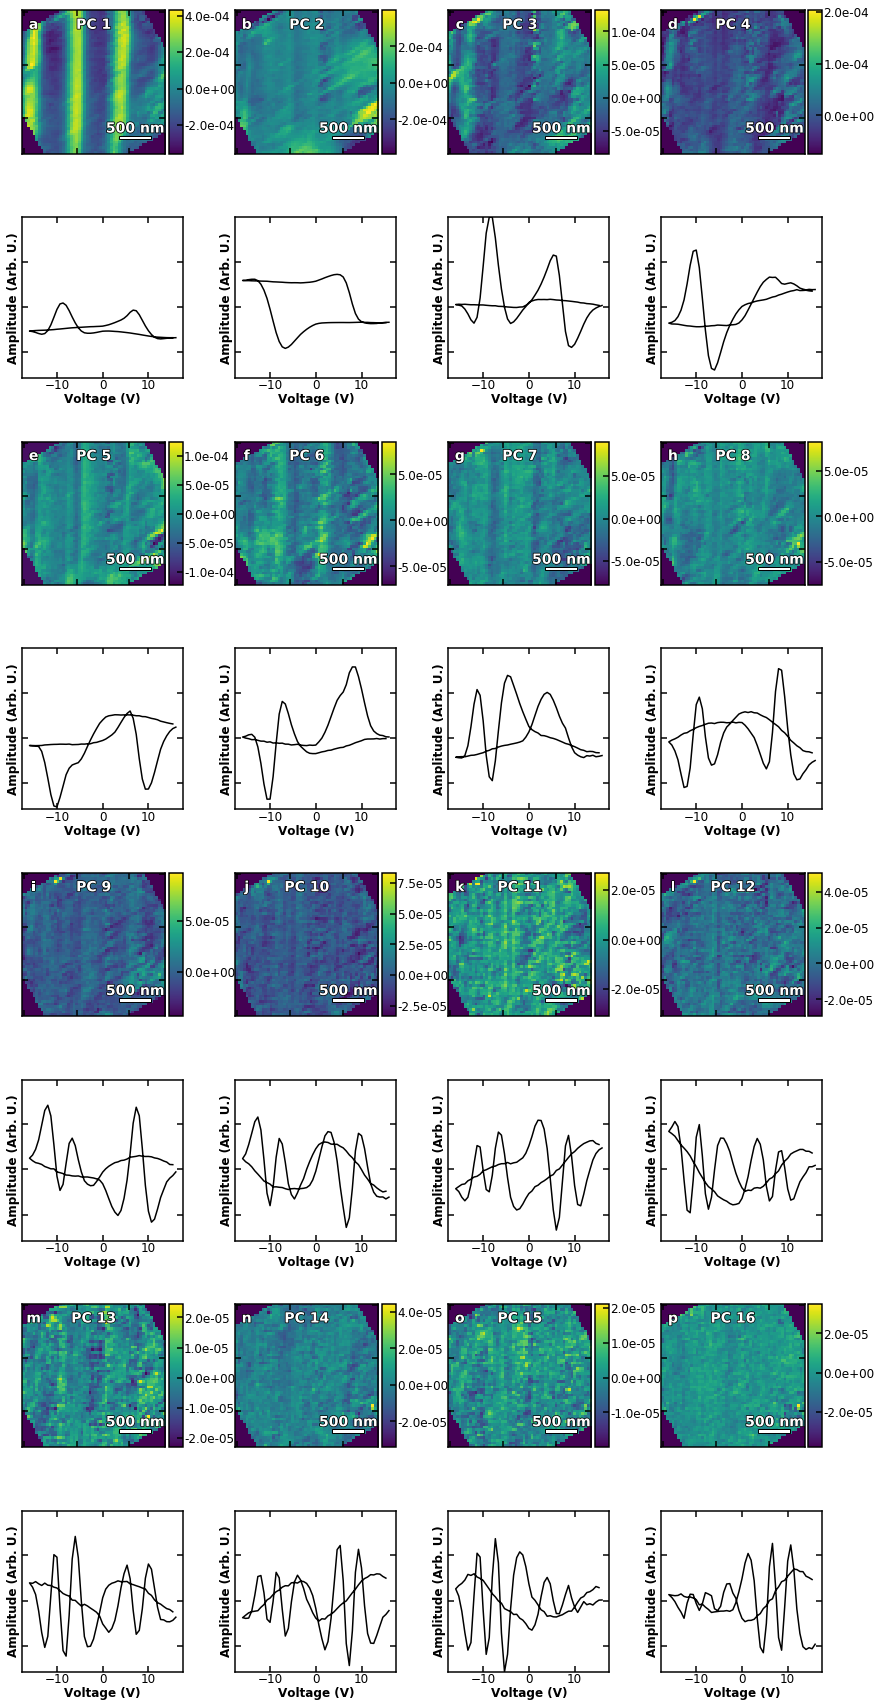

In [12]:
# Computes the PCA
# second index represents the number of components to compute
machine_learning['pca']['amplitude'], _ = ml.pca(sg_filtered['amplitude'], 16)

# plots the pca results
viz.plot.pca_results(machine_learning['pca']['amplitude'], data,
                     signal_info, printing, folder_pca,
                     plot_format, 'amplitude', filename='amplitude')

**Figure J10 |  Principal component analysis the amplitude obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Phase

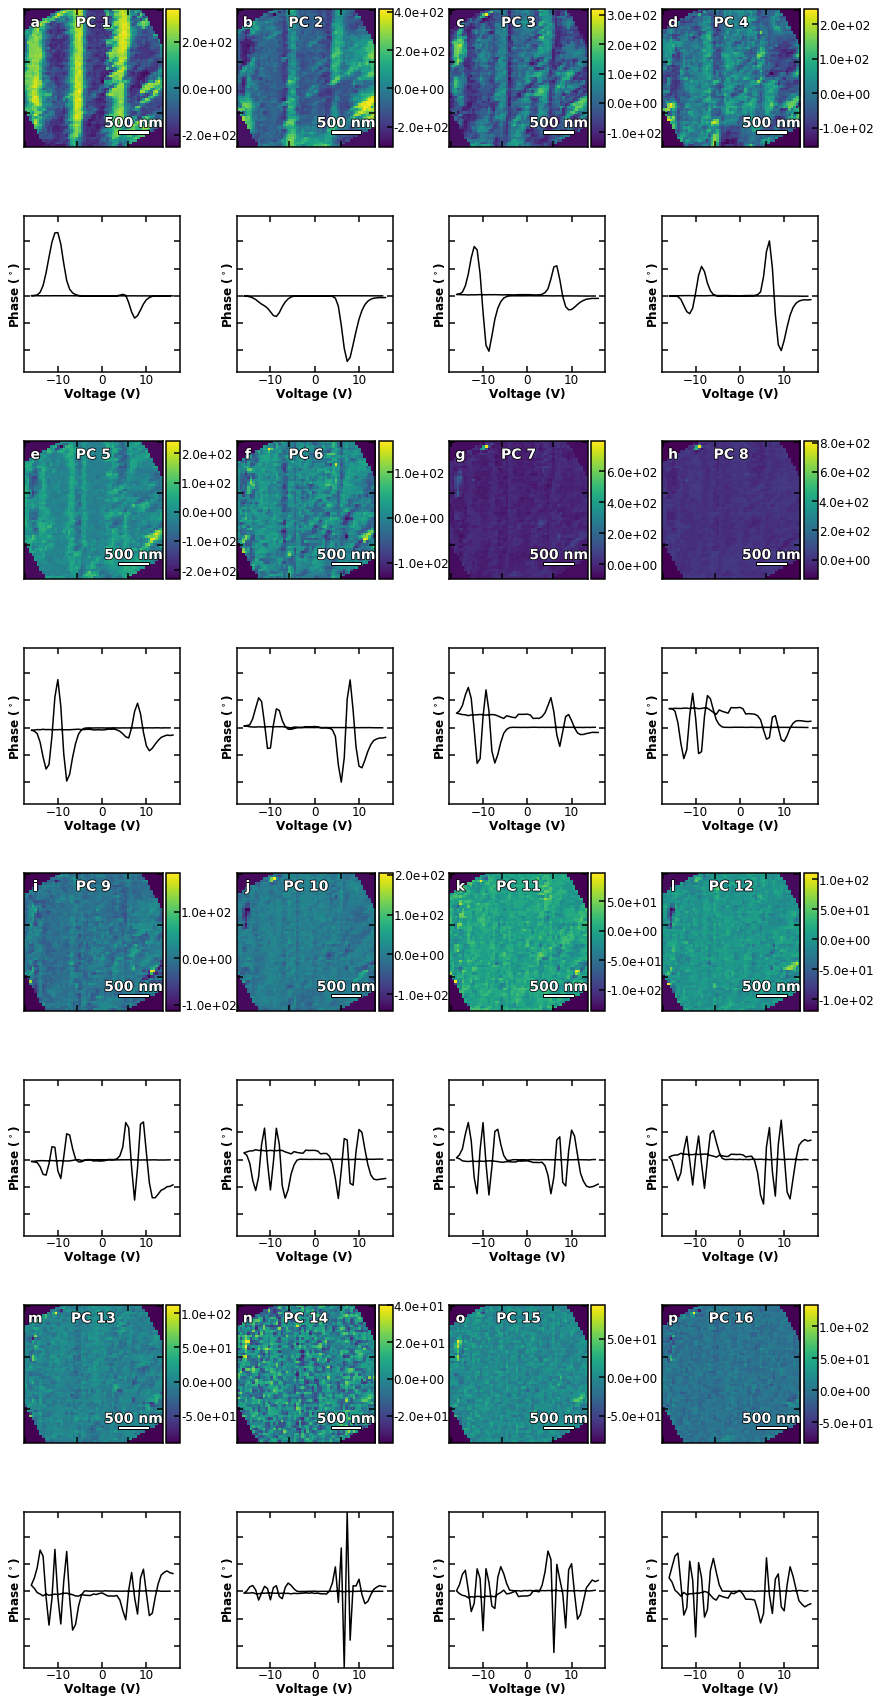

In [13]:
# Computes the PCA
# second index represents the number of components to compute
machine_learning['pca']['phase'], _ = ml.pca(sg_filtered['phase'], 16)

# plots the pca results
viz.plot.pca_results(machine_learning['pca']['phase'], data,
                     signal_info, printing, folder_pca,
                     plot_format, 'phase', filename='phase')

**Figure J11 |  Principal component analysis the phase obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Resonance Frequency

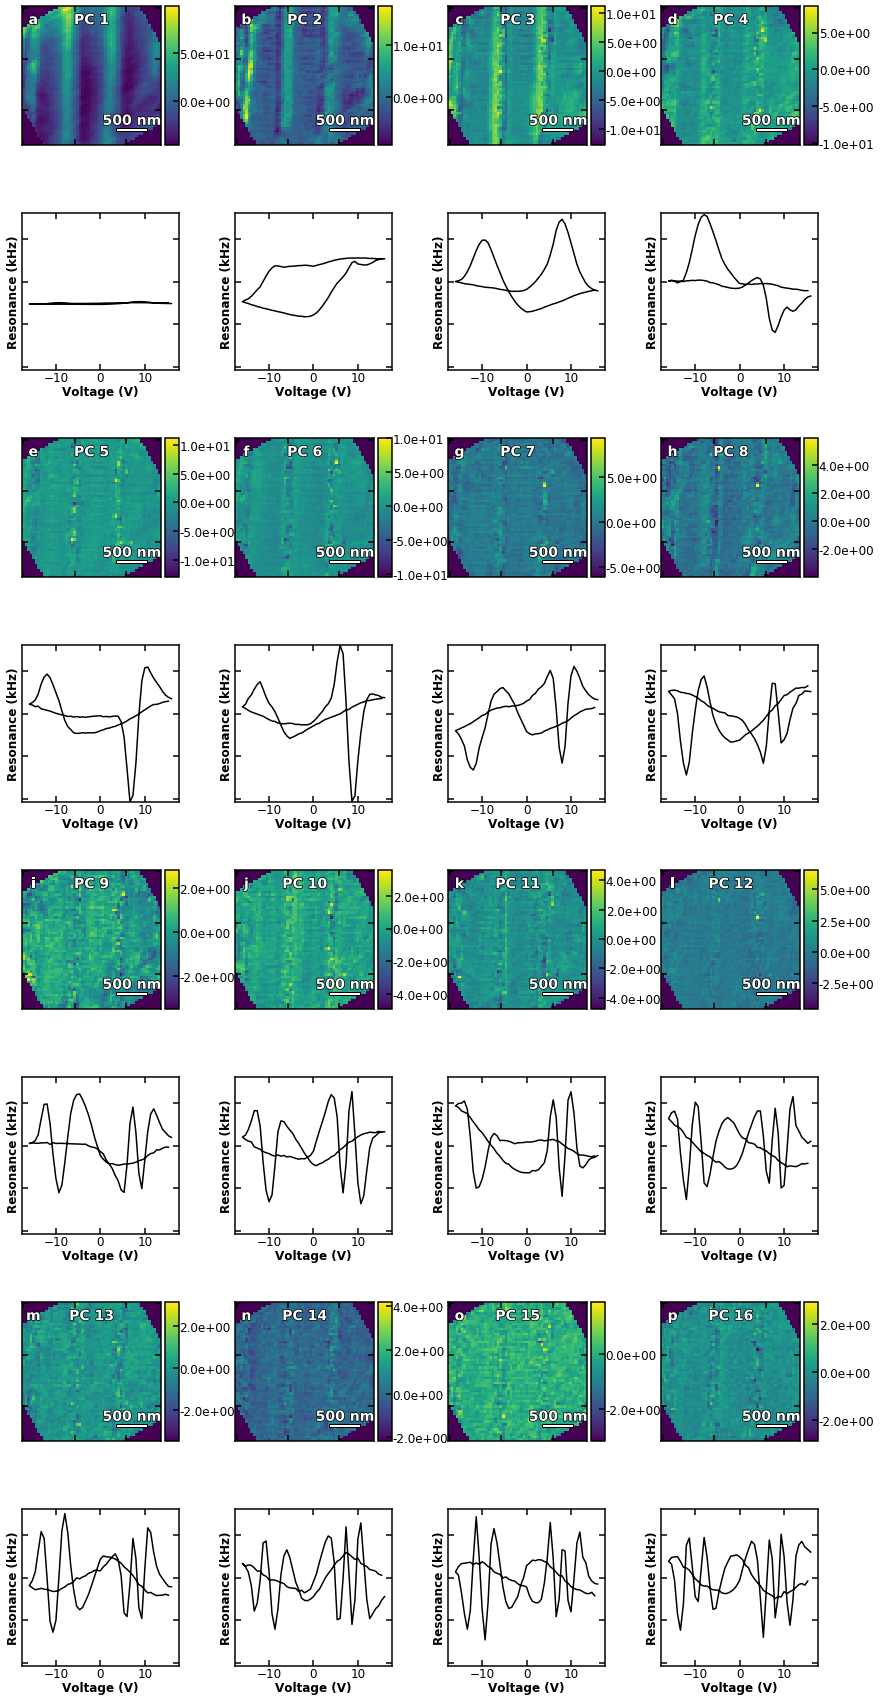

In [14]:
# Computes the PCA
# second index represents the number of components to compute
machine_learning['pca']['resonance'], _ = ml.pca(sg_filtered['resonance'], 16)

# plots the pca results
viz.plot.pca_results(machine_learning['pca']['resonance'], data,
                     signal_info, printing, folder_pca,
                     plot_format, 'resonance', filename='resonance')

**Figure J12 |  Principal component analysis the resonance frequency obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Quality Factor

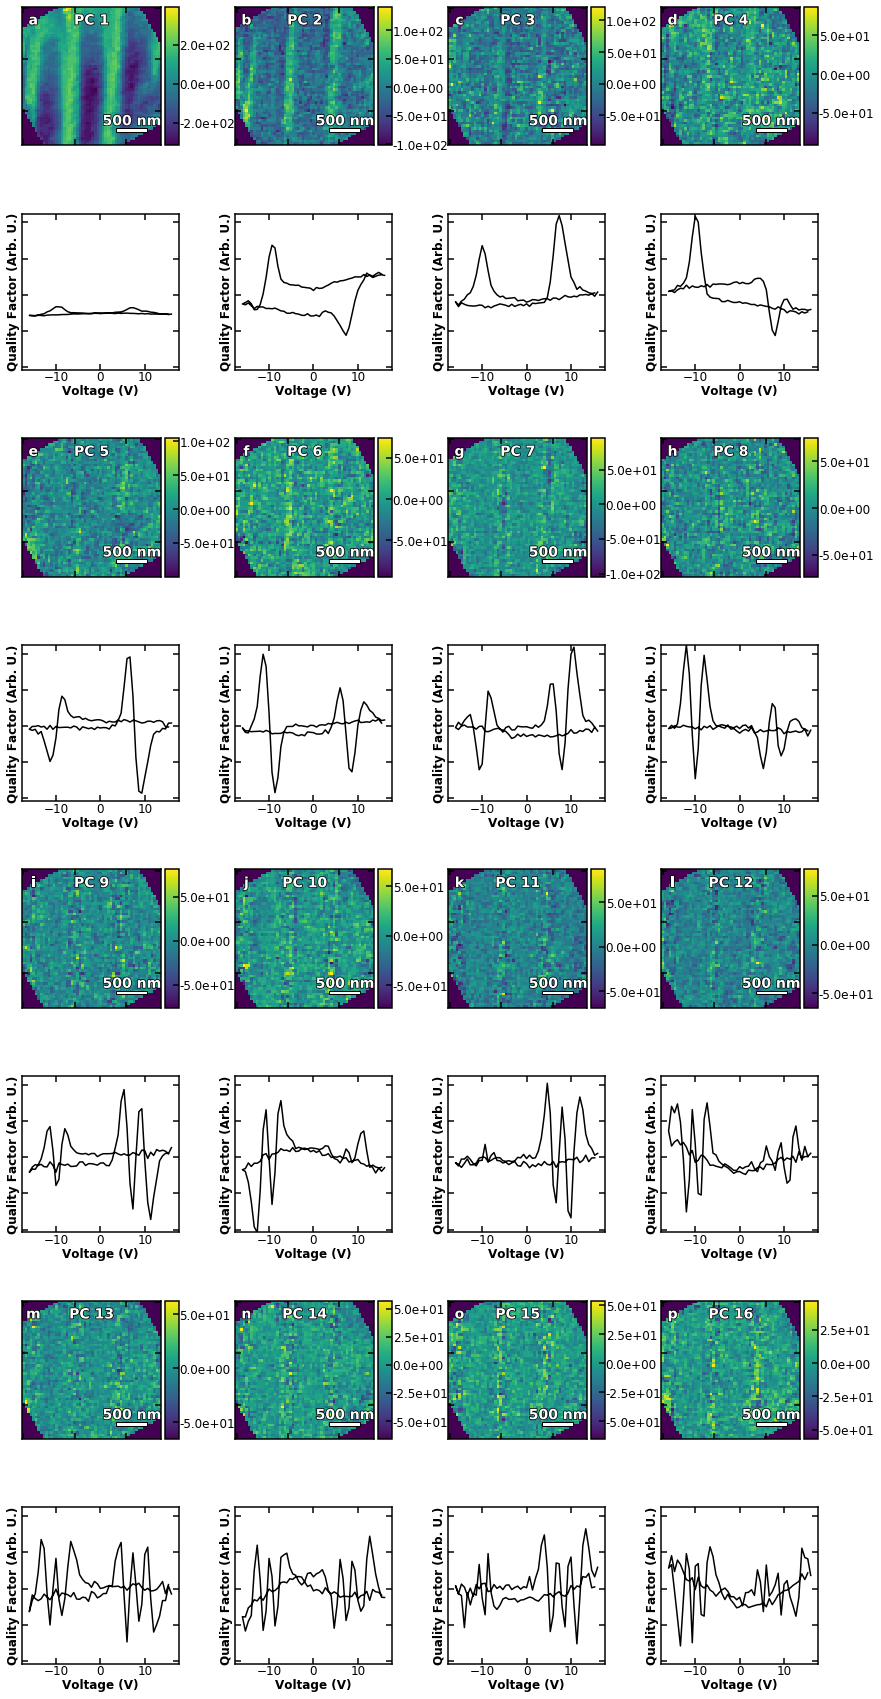

In [15]:
# Computes the PCA
# second index represents the number of components to compute
machine_learning['pca']['quality_factor'], _ = ml.pca(
    sg_filtered['quality_factor'], 16)

# plots the pca results
viz.plot.pca_results(machine_learning['pca']['quality_factor'], data,
                     signal_info, printing, folder_pca,
                     plot_format, 'quality_factor', filename='quality_factor')

**Figure J13 |  Principal component analysis the quality factor obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

## Non-Negative Matrix Factorization

### Piezoresponse

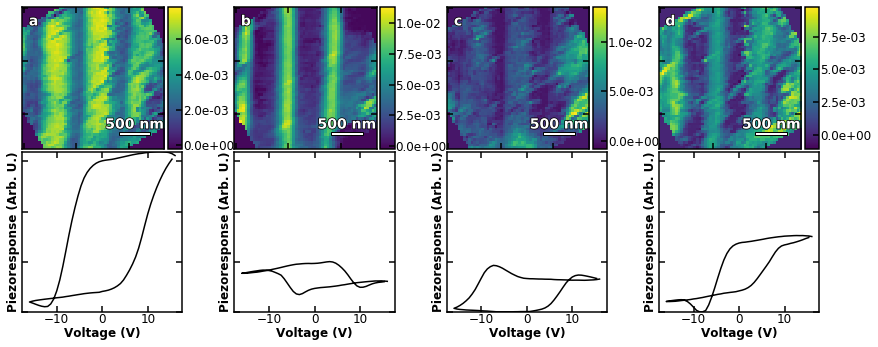

In [16]:
# builds the model for NMF
model = NMF(n_components=4, init='random',
            random_state=0, alpha=1e-7, l1_ratio=1)
# computes the nmf
machine_learning['nmf']['piezoresponse'] = ml.nmf(
    model, data['sg_filtered']['piezoresponse'])

# plots the nmf results
viz.plot.NMF(data['raw']['voltage'],
             machine_learning['nmf']['piezoresponse'],
             printing,
             plot_format,
             signal_info['piezoresponse'],
             folder=folder_nmf,
             letter_labels=True,
             custom_order=[0, 2, 3, 1])

**Figure J14 |  Non-negative matrix factorization of the piezoresponse obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Amplitude

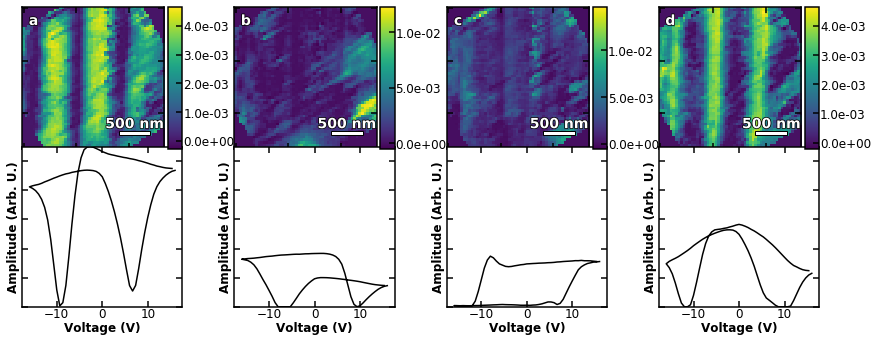

In [17]:
# builds the model for NMF
model = NMF(n_components=4, init='random',
            random_state=0, alpha=1e-7, l1_ratio=1)
# computes the nmf
machine_learning['nmf']['amplitude'] = ml.nmf(
    model, data['sg_filtered']['amplitude'])

# plots the nmf results
viz.plot.NMF(data['raw']['voltage'],
             machine_learning['nmf']['amplitude'],
             printing,
             plot_format,
             signal_info['amplitude'],
             folder=folder_nmf,
             letter_labels=True,
             custom_order=[0, 2, 3, 1])

**Figure J15 |  Non-negative matrix factorization of the amplitude obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Phase

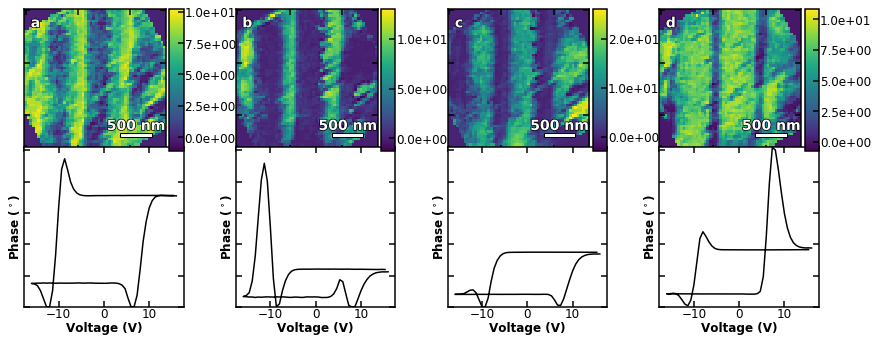

In [18]:
# builds the model for NMF
model = NMF(n_components=4, init='random',
            random_state=0, alpha=1e-7, l1_ratio=1)
# computes the nmf
machine_learning['nmf']['phase'] = ml.nmf(model, data['sg_filtered']['phase'])

# plots the nmf results
viz.plot.NMF(data['raw']['voltage'],
             machine_learning['nmf']['phase'],
             printing,
             plot_format,
             signal_info['phase'],
             folder=folder_nmf,
             letter_labels=True,
             custom_order=[0, 2, 3, 1])

**Figure J16 |  Non-negative matrix factorization of the phase obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Resonance Frequency

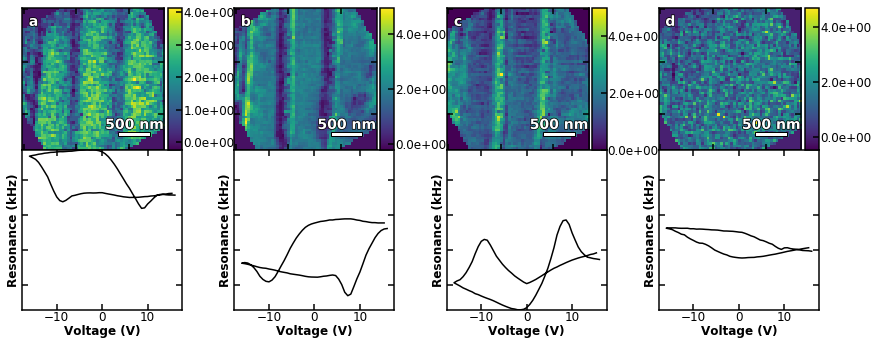

In [19]:
# builds the model for NMF
model = NMF(n_components=4, init='random',
            random_state=0, alpha=1e-7, l1_ratio=1)
# computes the nmf
machine_learning['nmf']['resonance'] = ml.nmf(
    model, data['sg_filtered']['resonance'])

# plots the nmf
viz.plot.NMF(data['raw']['voltage'],
             machine_learning['nmf']['resonance'],
             printing,
             plot_format,
             signal_info['resonance'],
             folder=folder_nmf,
             letter_labels=True,
             custom_order=[0, 2, 3, 1])

**Figure J17 |  Non-negative matrix factorization of the resonance frequency obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Quality Factor

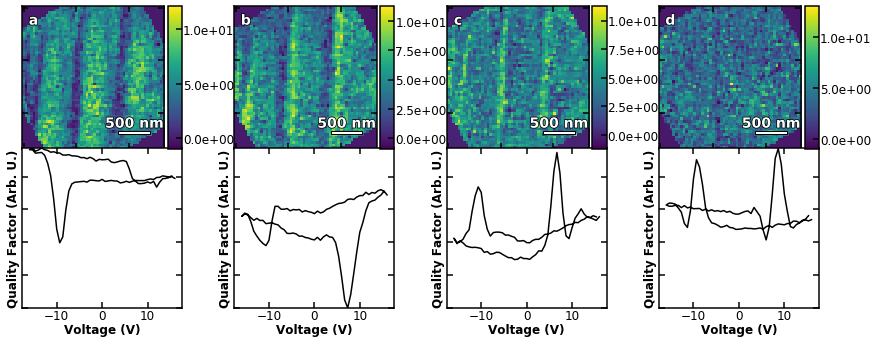

In [20]:
# builds the model for NMF
model = NMF(n_components=4, init='random',
            random_state=0, alpha=1e-7, l1_ratio=1)
# computes the nmf
machine_learning['nmf']['quality_factor'] = ml.nmf(
    model, data['sg_filtered']['quality_factor'])

# plots the nmf
viz.plot.NMF(data['raw']['voltage'],
             machine_learning['nmf']['quality_factor'],
             printing,
             plot_format,
             signal_info['quality_factor'],
             folder=folder_nmf,
             letter_labels=True,
             custom_order=[0, 2, 3, 1])

**Figure J18 |  Non-negative matrix factorization of the quality factor obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

## Clustering

In [21]:
# Sets the number of clusters in the divisive clustering
clustering = {'initial_clusters': 2,
              'c_clusters': 5,
              'a_clusters': 4}

# Sets the names of the maps
names = {('c/a-a${_1}$/a${_2}$', 'cluster_ca'),
         ('a${_1}$/a${_2}$', 'a_map'),
         ('c/a', 'c_map')}

### Piezoresponse

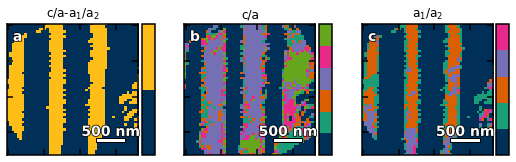

In [31]:
# clusters the piezoresponse curves
machine_learning['clustering']['piezoresponse'] = ml.k_means_clustering(
    data, 'piezoresponse',
    clustering, seed=42)

# plots the cluster maps
viz.plot.hierarchical_clustering(machine_learning['clustering']['piezoresponse'],
                                names,
                                plot_format)

**Figure J19 | Divisive clustering of the piezoresponse curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

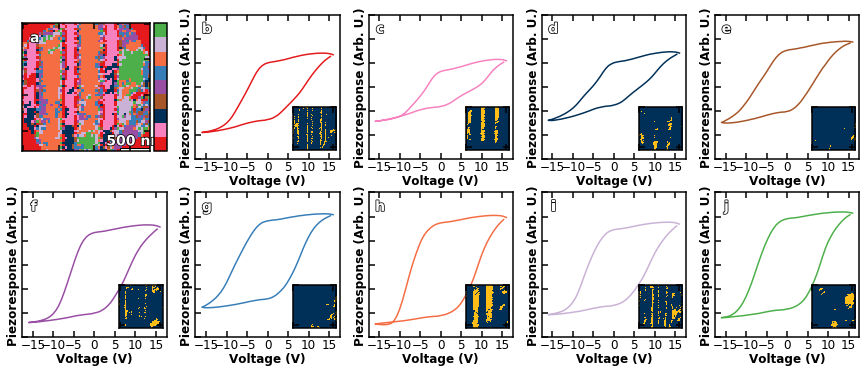

In [32]:
# sets the y range for the plots
signal_info['piezoresponse']['y_lim'] = [-1.5e-4, 1.5e-4]

# plots the cluster maps and average hysteresis loops
viz.plot.clustered_hysteresis(data['raw']['voltage'],
                              data['sg_filtered']['piezoresponse'],
                              machine_learning['clustering']['piezoresponse'],
                              plot_format,
                              signal_info,
                              'piezoresponse',
                              printing,
                              folder_clustering)

**Figure J20 | Divisive clustering of the piezoresponse curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Amplitude

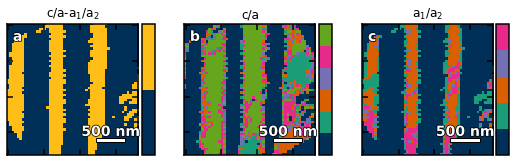

In [33]:
# clusters the amplitude curves
machine_learning['clustering']['amplitude'] = ml.k_means_clustering(
    data, 'amplitude',
    clustering, seed=42)

# plots the amplitude clustering maps
viz.plot.hierarchical_clustering(machine_learning['clustering']['amplitude'],
                                names, plot_format)

**Figure J21 | Divisive clustering of the amplitude curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

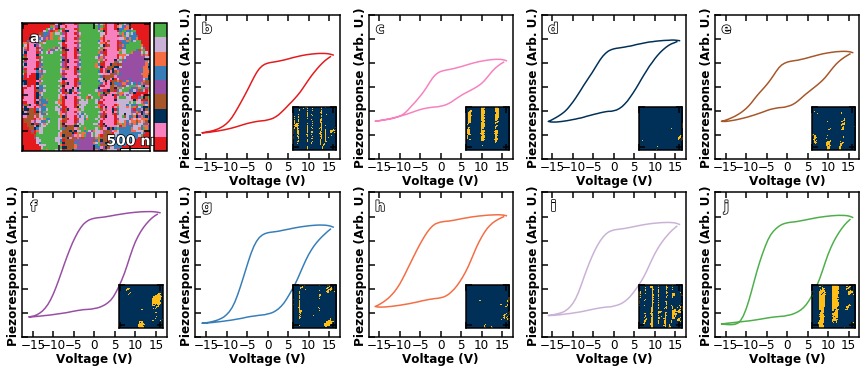

In [34]:
# plots the clustering map and average hysteresis loop
viz.plot.clustered_hysteresis(data['raw']['voltage'],
                              data['sg_filtered']['piezoresponse'],
                              machine_learning['clustering']['amplitude'],
                              plot_format,
                              signal_info,
                              'amplitude',
                              printing,
                              folder_clustering)

**Figure J22 | Divisive clustering of the amplitude curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Phase

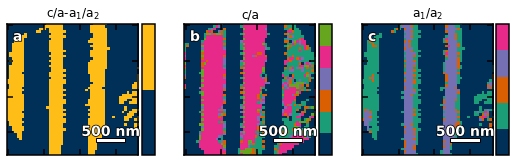

In [35]:
# clusters the phase loops
machine_learning['clustering']['phase'] = ml.k_means_clustering(
    data, 'phase',
    clustering, seed=42)

# plots the cluster maps
viz.plot.hierarchical_clustering(machine_learning['clustering']['phase'],
                                names, plot_format)

**Figure J23 | Divisive clustering of the phase curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

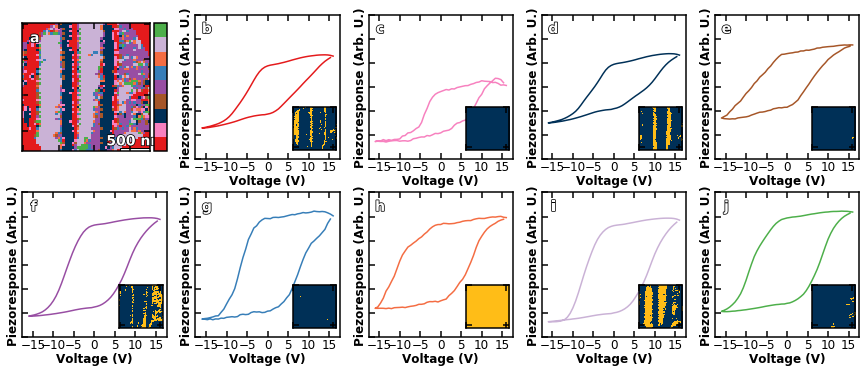

In [36]:
# plots the clustering map and average hysteresis loop
viz.plot.clustered_hysteresis(data['raw']['voltage'],
                              data['sg_filtered']['piezoresponse'],
                              machine_learning['clustering']['phase'],
                              plot_format,
                              signal_info,
                              'phase',
                              printing,
                              folder_clustering)

### Resonance Frequency

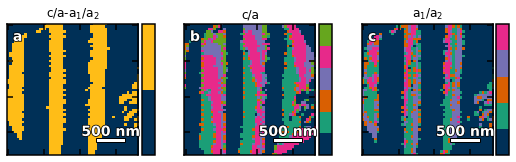

In [37]:
# clusters the resonance frequency
machine_learning['clustering']['resonance'] = ml.k_means_clustering(
    data, 'resonance',
    clustering, seed=42)

# plots the resonance frequency maps
viz.plot.hierarchical_clustering(machine_learning['clustering']['resonance'],
                                names, plot_format)

**Figure J24 | Divisive clustering of the resonance frequency curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

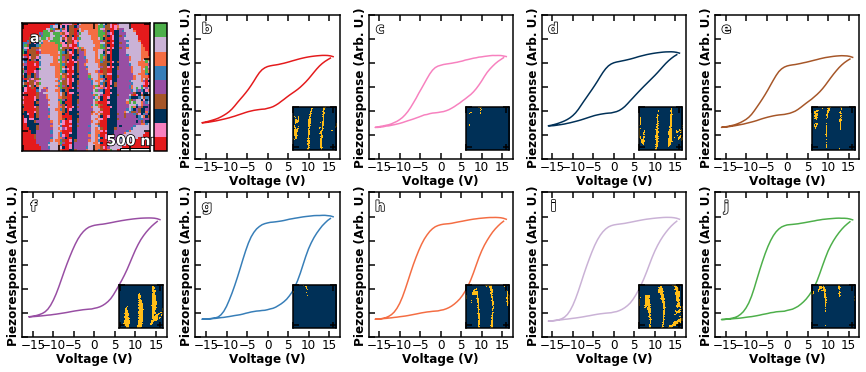

In [38]:
# plots the clusters with average hysteresis loops
viz.plot.clustered_hysteresis(data['raw']['voltage'],
                              data['sg_filtered']['piezoresponse'],
                              machine_learning['clustering']['resonance'],
                              plot_format,
                              signal_info,
                              'resonance',
                              printing,
                              folder_clustering)

**Figure J25 | Divisive clustering of the resonance frequency curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Quality Factor

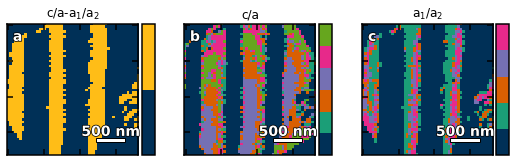

In [39]:
# clusters the quality factor curves
machine_learning['clustering']['quality_factor'] = ml.k_means_clustering(
    data, 'quality_factor',
    clustering, seed=42)

# plots the cluster maps
viz.plot.hierarchical_clustering(machine_learning['clustering']['quality_factor'],
                                names, plot_format)

**Figure J26 | Divisive clustering of the quality factor curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

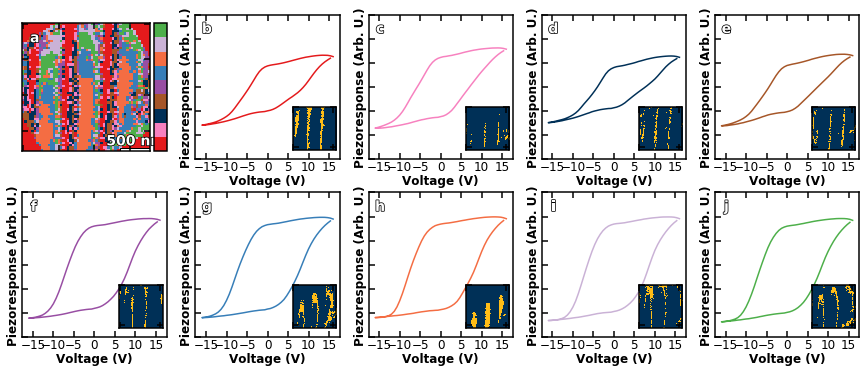

In [40]:
# plots the cluster maps and average hysteresis loops
viz.plot.clustered_hysteresis(data['raw']['voltage'],
                              data['sg_filtered']['piezoresponse'],
                              machine_learning['clustering']['quality_factor'],
                              plot_format,
                              signal_info,
                              'quality_factor',
                              printing,
                              folder_clustering)

**Figure J27 | Divisive clustering of the quality factor curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

## PCA + Clustering

### Piezoresponse

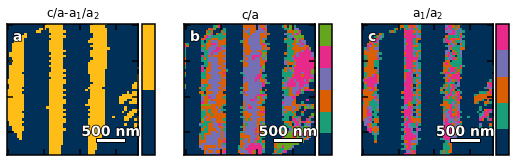

In [41]:
signal = 'piezoresponse'

# computes the PCA
eigenvalues = ml.weights_as_embeddings(machine_learning['pca'][signal],
                                       data['sg_filtered'][signal])

# clusters the PCA results
machine_learning['pca_clustering'][signal] = ml.k_means_clustering(
    data, signal,
    clustering, seed=42, pca_in=eigenvalues)

# plots the cluster maps
viz.plot.hierarchical_clustering(machine_learning['pca_clustering'][signal],
                                names, plot_format)

**Figure J28 | Divisive clustering of the first 16 principal components of the piezoresponse curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

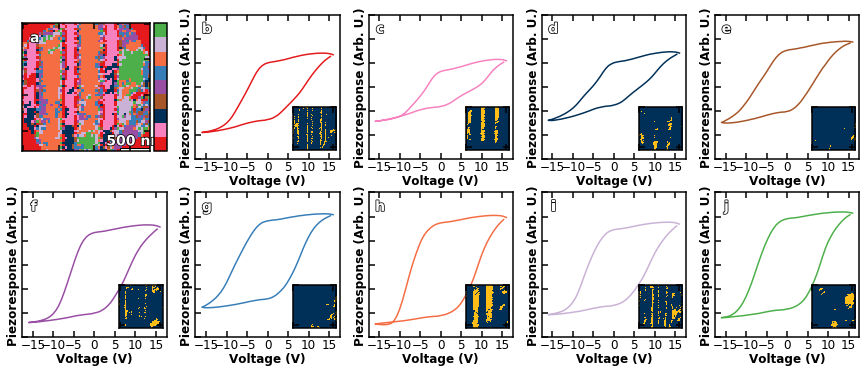

In [42]:
# plots the clustering results and average hysteresis curves
viz.plot.clustered_hysteresis(data['raw']['voltage'],
                              data['sg_filtered']['piezoresponse'],
                              machine_learning['clustering'][signal],
                              plot_format,
                              signal_info,
                              signal,
                              printing,
                              folder_pca_clustering)

**Figure J29 | Divisive clustering of the first 16 principal components of the piezoresponse curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Amplitude

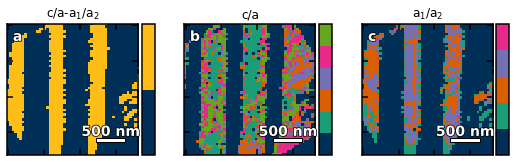

In [43]:
signal = 'amplitude'

# computes the pca
eigenvalues = ml.weights_as_embeddings(machine_learning['pca'][signal],
                                       data['sg_filtered'][signal])
# clusters the loops
machine_learning['pca_clustering'][signal] = ml.k_means_clustering(
    data, signal,
    clustering, seed=42, pca_in=eigenvalues)

# plots the clustering maps
viz.plot.hierarchical_clustering(machine_learning['pca_clustering'][signal],
                                names, plot_format)

**Figure J30 | Divisive clustering of the first 16 principal components of the amplitude curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

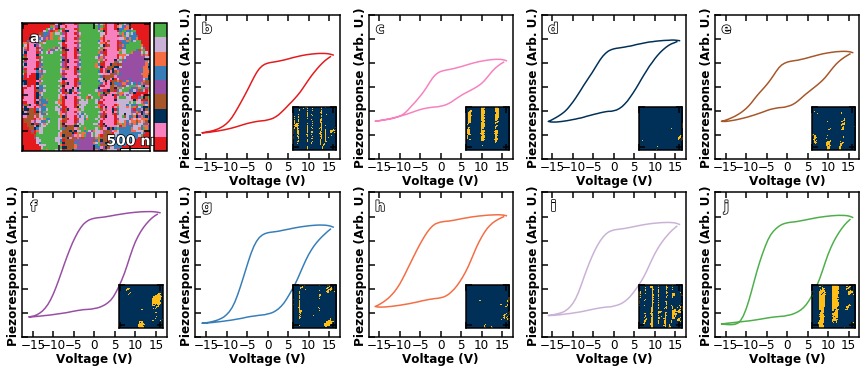

In [44]:
# plots the clustering maps and average hysteresis loops
viz.plot.clustered_hysteresis(data['raw']['voltage'],
                              data['sg_filtered']['piezoresponse'],
                              machine_learning['clustering'][signal],
                              plot_format,
                              signal_info,
                              signal,
                              printing,
                              folder_pca_clustering)

**Figure J31 | Divisive clustering of the first 16 principal components of the amplitude curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Phase

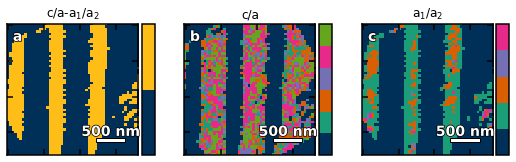

In [45]:
signal = 'phase'

# computes the pca
eigenvalues = ml.weights_as_embeddings(machine_learning['pca'][signal],
                                       data['sg_filtered'][signal])
# clusters the pca
machine_learning['pca_clustering'][signal] = ml.k_means_clustering(
    data, signal,
    clustering, seed=42, pca_in=eigenvalues)
# plots the cluster maps
viz.plot.hierarchical_clustering(machine_learning['pca_clustering'][signal],
                                names, plot_format)

**Figure J32 | Divisive clustering of the first 16 principal components of the phase curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

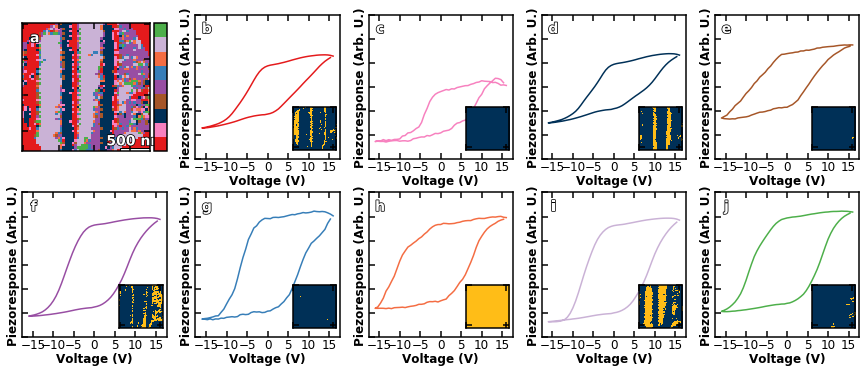

In [46]:
# plots the clustering maps and average hysteresis loops
viz.plot.clustered_hysteresis(data['raw']['voltage'],
                              data['sg_filtered']['piezoresponse'],
                              machine_learning['clustering'][signal],
                              plot_format,
                              signal_info,
                              signal,
                              printing,
                              folder_pca_clustering)

**Figure J33 | Divisive clustering of the first 16 principal components of the phase curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Resonance

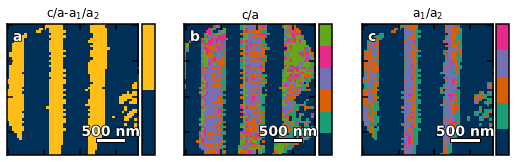

In [47]:
signal = 'resonance'

# computes the pca
eigenvalues = ml.weights_as_embeddings(machine_learning['pca'][signal],
                                       data['sg_filtered'][signal])
# clusters the results
machine_learning['pca_clustering'][signal] = ml.k_means_clustering(
    data, signal,
    clustering, seed=42, pca_in=eigenvalues)
# plots the cluster maps
viz.plot.hierarchical_clustering(machine_learning['pca_clustering'][signal],
                                names, plot_format)

**Figure J34 | Divisive clustering of the first 16 principal components of the resonance frequency curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

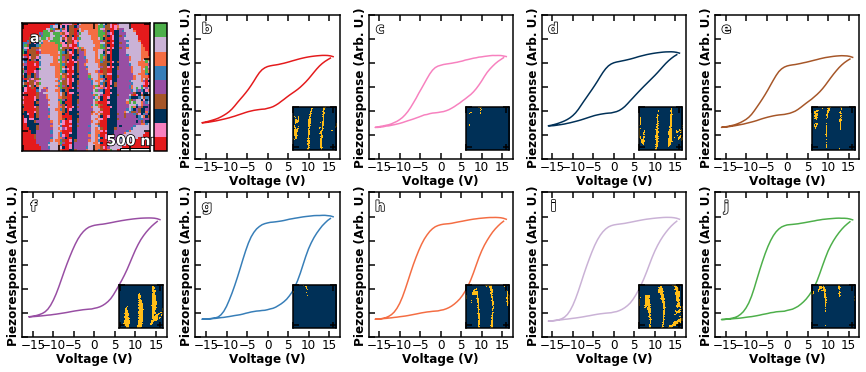

In [48]:
# plots the clustering maps and average hysteresis loops
viz.plot.clustered_hysteresis(data['raw']['voltage'],
                              data['sg_filtered']['piezoresponse'],
                              machine_learning['clustering'][signal],
                              plot_format,
                              signal_info,
                              signal,
                              printing,
                              folder_pca_clustering)

**Figure J35 | Divisive clustering of the first 16 principal components of the resonance frequency curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

### Quality Factor

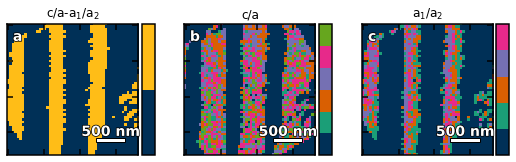

In [49]:
signal = 'quality_factor'

# computes the pca
eigenvalues = ml.weights_as_embeddings(machine_learning['pca'][signal],
                                       data['sg_filtered'][signal])
# computes the cluster maps
machine_learning['pca_clustering'][signal] = ml.k_means_clustering(
    data, signal,
    clustering, seed=42, pca_in=eigenvalues)
# plots the cluster maps
viz.plot.hierarchical_clustering(machine_learning['pca_clustering'][signal],
                                names, plot_format)

**Figure J36 | Divisive clustering of the first 16 principal components of the quality factor curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

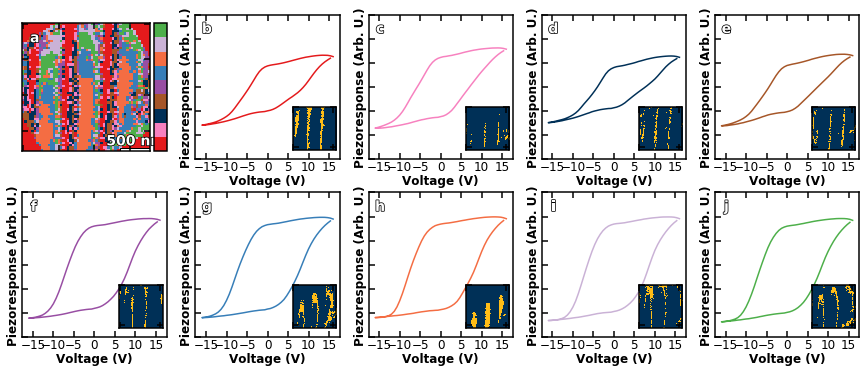

In [50]:
# plots the clustering maps and average hysteresis loops
viz.plot.clustered_hysteresis(data['raw']['voltage'],
                              data['sg_filtered']['piezoresponse'],
                              machine_learning['clustering'][signal],
                              plot_format,
                              signal_info,
                              signal,
                              printing,
                              folder_pca_clustering)

**Figure J37 | Divisive clustering of the first 16 principal components of the quality factor curves obtained from band excitation switching spectroscopy of PbZr${_{0.2}}$Ti${_{0.8}}$O${_{3}}$ with hierarchical domain structures.**

# Deep Learning Long Short-Term Memory Reccurent Neural Network Autoencoder

## Piezoresponse

### Building the model

In [51]:
# selects the folder where the pre-trained models are located
model_folder = './Trained Models/Piezoresponse/Bidirect_lstm_size064_enc4_emb16_dec4_lr3m05_drop0.2_l1norm_1m05_batchnorm_TT_001'

# Function to build the model
piezoresponse_model, run_id = rnn.rnn('lstm', 64, 4, 4, 16,
                                      data['sg_filtered']['piezoresponse'].shape[1],
                                      lr=3e-5, drop_frac=.2, l1_norm=1e-4,
                                      batch_norm=[True, True])

W0904 10:50:22.828192 4738590144 deprecation_wrapper.py:119] From /Users/joshuaagar/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0904 10:50:22.852457 4738590144 deprecation_wrapper.py:119] From /Users/joshuaagar/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 10:50:22.855805 4738590144 deprecation_wrapper.py:119] From /Users/joshuaagar/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0904 10:50:23.243137 4738590144 deprecation_wrapper.py:119] From /Users/joshuaagar/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placehold

### Train the model

In [52]:
# select if the user will train a new model.
# Note training requires GPU access and can take a long time (1-2 days)
train_model = False

if train_model:
    # trains the model saving results as checkpoints
    rnn.train_model(run_id, piezoresponse_model,
                    data['normalized']['piezoresponse'],
                    data['normalized']['val_piezoresponse'],
                    folder_piezoresponse_autoencoder)

### Loads Pre-Trained Model

In [53]:
# loading the pre-trained weights
piezoresponse_model.load_weights(model_folder + '/weights.15179-0.00.hdf5')

# Updates the decoder based on decoding optimization.
# this was done to improve the quality of the reconstruction.
piezoresponse_model, piezoresponse_decoder = rnn.update_decoder(piezoresponse_model,
                                                                './Trained Models/Piezoresponse/weights.00033723-0.0022.hdf5')

W0904 10:50:25.542133 4738590144 deprecation_wrapper.py:119] From /Users/joshuaagar/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



In [54]:
# Displays the model summary
piezoresponse_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 96, 128)           33792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 96, 128)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 96, 128)           98816     
_________________________________________________________________
dropout_2 (Dropout)          (None, 96, 128)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 96, 128)           98816     
_________________________________________________________________
dropout_3 (Dropout)          (None, 96, 128)           0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 128)              

## Model Validation

### Validation Loss

In [55]:
# loss for the training data
print('Training Data Set:')
score = piezoresponse_model.evaluate(np.atleast_3d(data['normalized']['piezoresponse']),
                                     np.atleast_3d(data['normalized']['piezoresponse']))
print('Test loss:', score)

# loss for the validation data
print('Validation Data Set:')
score = piezoresponse_model.evaluate(np.atleast_3d(data['normalized']['val_piezoresponse']),
                                     np.atleast_3d(data['normalized']['val_piezoresponse']))
print('Validation loss:', score)

Training Data Set:
3600/3600 [==============================] - 12s 3ms/step
Test loss: 0.002399990280262298
Validation Data Set:
3600/3600 [==============================] - 11s 3ms/step
Validation loss: 0.0037915436550974846


### Training Results

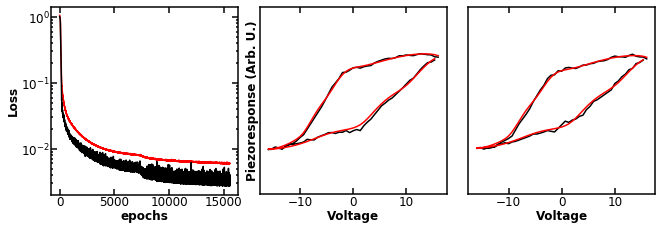

In [56]:
# plots the loss and an example reconstruction
# set to plot a random loop
# to plots a specific point add i=(pixel position)
viz.plot.training_loss(model_folder,
                       data,
                       piezoresponse_model,
                       'piezoresponse',
                       signal_info,
                       printing, folder_piezoresponse_autoencoder)

**Figure J38 | Piezoresponse autoencoder traiing results. a,** Training loss (training - black) validation (red). Example hysteresis loop from the **b,** training, **c,** validation data set. Black curve shows the original measured data, red curve show the autoencoder reconstruction.    

### Low Dimensional Layer

In [57]:
# Computes the low dimensional layer
piezoresponse_embeddings = rnn.get_activations(piezoresponse_model,
                                               data['normalized']['piezoresponse'],
                                               9)

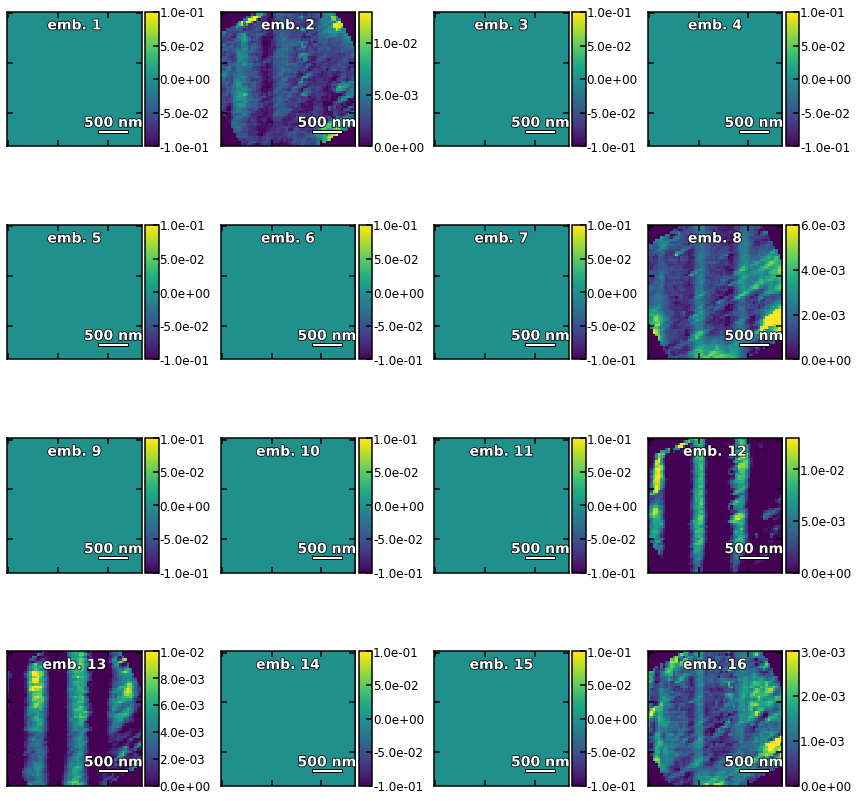

In [58]:
# defines the ranges for the images
ranges = [0, 1.3e-2, 0, 0, 0,
          0, 0, 6e-3, 0, 0,
          0, 1.3e-2, 1e-2, 0, 0, 3e-3]

# plots the embedding maps
_ = viz.plot.embedding_maps(piezoresponse_embeddings,
                            printing,
                            plot_format,
                            folder_piezoresponse_autoencoder,
                            filename='./Piezoresponse_embeddings',
                            ranges=ranges)

**Figure J39 | Output of low dimensional layer obtained from the piezoreponse autoencoder.**

### Plot Embedding and Line Trace

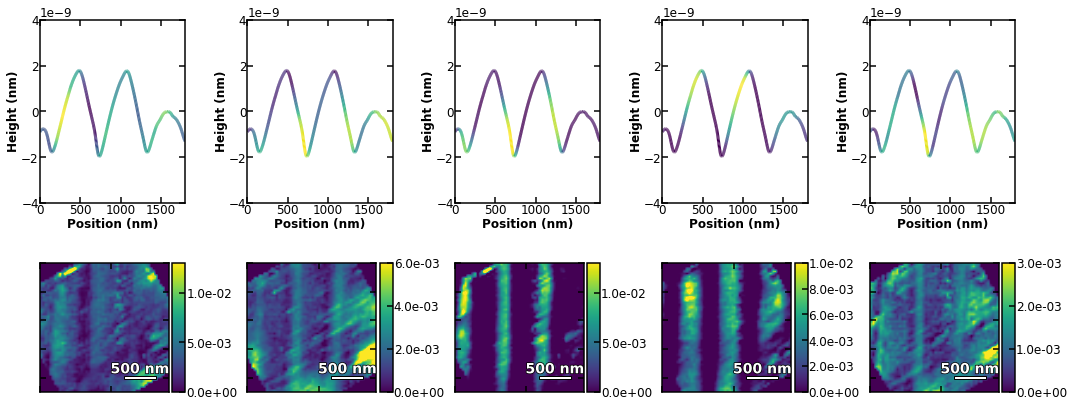

In [59]:
# rotates and crops the topography image
crop_topo, scale = util.core.rotate_and_crop(
    np.flipud(imported['data']['HeightFinal'].reshape(1024, 1024).T))

# creates the figures and axes in a pretty way
num_img = 10
fig, ax = viz.format.layout_fig(num_img,
                                mod=num_img // 2)

# plots the selected embeddings superimposed on the line trace
for i, v in enumerate([1, 7, 11, 12, 15]):

    viz.plot.embedding_line_trace(ax,
                                  i,
                                  crop_topo,
                                  piezoresponse_embeddings[:, v],
                                  [0, ranges[v]],
                                  plot_format,
                                  number=num_img // 2)

plt.tight_layout(pad=1)

# saves the figure
util.file.savefig(folder_piezoresponse_autoencoder +
                  '/embedding_and_topography', printing)

**Figure J40 | Plots of selected embedding maps from piezoelectric autoencoder superimposed on average topography.**

### Exports Training Images

Exports low dimensional layer computed after each epoch (with improvement) during training. This allows the visualization of the effect of L${_1}$ regularization.

In [60]:
# selects to export training images
# note this take a long time (1-2 hours)
export_training_images = False

if export_training_images:
    if np.int(io_transfer.get_size(model_folder) / 1e8) > 1:
        # exports all low dimensional layers from training
        viz.plot.training_images(piezoresponse_model,
                                 data,
                                 model_folder,
                                 printing,
                                 plot_format,
                                 folder_piezoresponse_autoencoder_training_movie)
        if printing['movies']:
            # Script to making movie
            util.file.make_movie('Piezoresponse_training_movie',
                                 folder_piezoresponse_autoencoder_training_movie,
                                 './',
                                 'png',
                                 10,
                                 output_format='mp4')

### Make Generator Movie

Makes a movie where the magnitude of the embedding is manipulated and the decoder is used to generate the piezoresponse

In [61]:
if printing['movies']:

    # defines the ranges for the embeddings
    ranges = [1.3e-2, 6e-3, 1.3e-2, 1e-2, 3e-3]

    # generates images for the generator movie
    _ = viz.plot.generator_movie(piezoresponse_decoder, piezoresponse_embeddings,
                                 data['raw']['voltage'], 100, 500,
                                 ranges, folder_piezoresponse_autoencoder_movie,
                                 plot_format, printing,
                                 graph_layout=[5, 5])

    # Script to making movie
    util.file.make_movie('Piezoresponse_Generator_movie', folder_piezoresponse_autoencoder_movie,
                         './', 'png', 10, output_format='mp4', reverse=True)

### Plots Generator Results

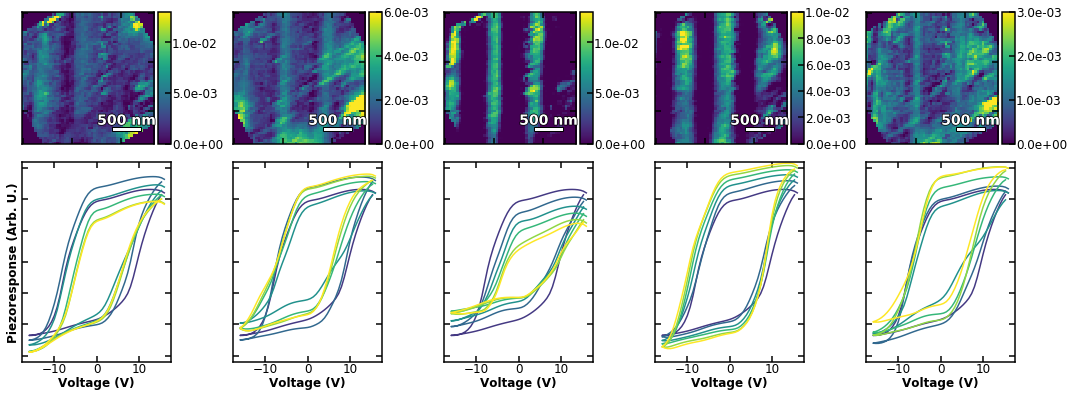

In [62]:
# defines the range for the embeddings
ranges = [1.3e-2, 6e-3, 1.3e-2, 1e-2, 3e-3]

# plots the embedding layer and the generated results
viz.plot.generator_piezoresponse(piezoresponse_decoder,
                                 piezoresponse_embeddings,
                                 data['raw']['voltage'],
                                 ranges,
                                 6,
                                 100,
                                 printing,
                                 plot_format,
                                 folder_piezoresponse_autoencoder)

**Figure J41 | Plots of selected embedding maps from piezoelectric autoencoder bottom shows generated hysteresis loop obtained when varying each embedding.** The color of the piezoelectric hysteresis loop reflects the colors in the map

## Resonance

### Building the model

In [63]:
# selects the folder where the pre-trained model is saved
model_folder = './Trained Models/Resonance/Bidirect_lstm_size064_enc4_emb16_dec4_lr3m05_drop0.2_l1norm_0.0001_batchnorm_TT_001'

# Function to build the model
resonance_model, run_id = rnn.rnn(
    'lstm',
    64,
    4,
    4,
    16,
    data['sg_filtered']['resonance'].shape[1],
    lr=3e-5,
    drop_frac=.2,
    l1_norm=1e-4,
    batch_norm=[True, True])

### Train the model

In [64]:
# select if the user will train a new model.
# Note training requires GPU access and can take a long time (1-2 days)
train_model = False

if train_model:
    # trains the model saving each epoch (with improvement) as a checkpoint
    rnn.train_model(
        run_id,
        resonance_model,
        data['normalized']['resonance'],
        data['normalized']['val_resonance'],
        folder_resonance_autoencoder)

### Loads Pre-Trained Model

In [65]:
# loading the pre-trained weights
resonance_model.load_weights(model_folder + '/weights.00022570-0.0123.hdf5')

# loads the pre-trained weight from an optimized decoder
# training of the decoder was done to minimize reconstruction error
resonance_model, resonance_decoder = rnn.update_decoder(
    resonance_model,
    './Trained Models/Resonance/weights.00013412-0.0106.hdf5')

In [66]:
# Displays the model summary
resonance_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_13 (Bidirectio (None, 96, 128)           33792     
_________________________________________________________________
dropout_9 (Dropout)          (None, 96, 128)           0         
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 96, 128)           98816     
_________________________________________________________________
dropout_10 (Dropout)         (None, 96, 128)           0         
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 96, 128)           98816     
_________________________________________________________________
dropout_11 (Dropout)         (None, 96, 128)           0         
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 128)              

## Model Validation

### Validation Loss

In [67]:
# computes the training loss
print('Training Data Set:')
score = resonance_model.evaluate(np.atleast_3d(data['normalized']['resonance']),
                                 np.atleast_3d(data['normalized']['resonance']))
print('Test loss:', score)

# computes the validation loss
print('Validation Data Set:')
score = resonance_model.evaluate(np.atleast_3d(data['normalized']['val_resonance']),
                                 np.atleast_3d(data['normalized']['val_resonance']))
print('Validation loss:', score)

Training Data Set:
3600/3600 [==============================] - 11s 3ms/step
Test loss: 0.0104693962716394
Validation Data Set:
3600/3600 [==============================] - 11s 3ms/step
Validation loss: 0.019693881620963416


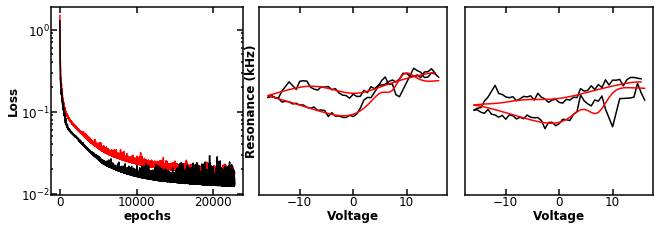

In [68]:
# plots the loss and an example reconstruction
# set to plot a random loop
# to plots a specific point add i=(pixel position)
viz.plot.training_loss(
    model_folder,
    data,
    resonance_model,
    'resonance',
    signal_info,
    printing,
    folder_resonance_autoencoder)

**Figure J43 | Resonance autoencoder traiing results. a,** Training loss (training - black) validation (red). Example hysteresis loop from the **b,** training, **c,** validation data set. Black curve shows the original measured data, red curve show the autoencoder reconstruction.  

In [69]:
# Computes the low dimensional layer
resonance_embeddings = rnn.get_activations(
    resonance_model,
    data['normalized']['resonance'],
    9)

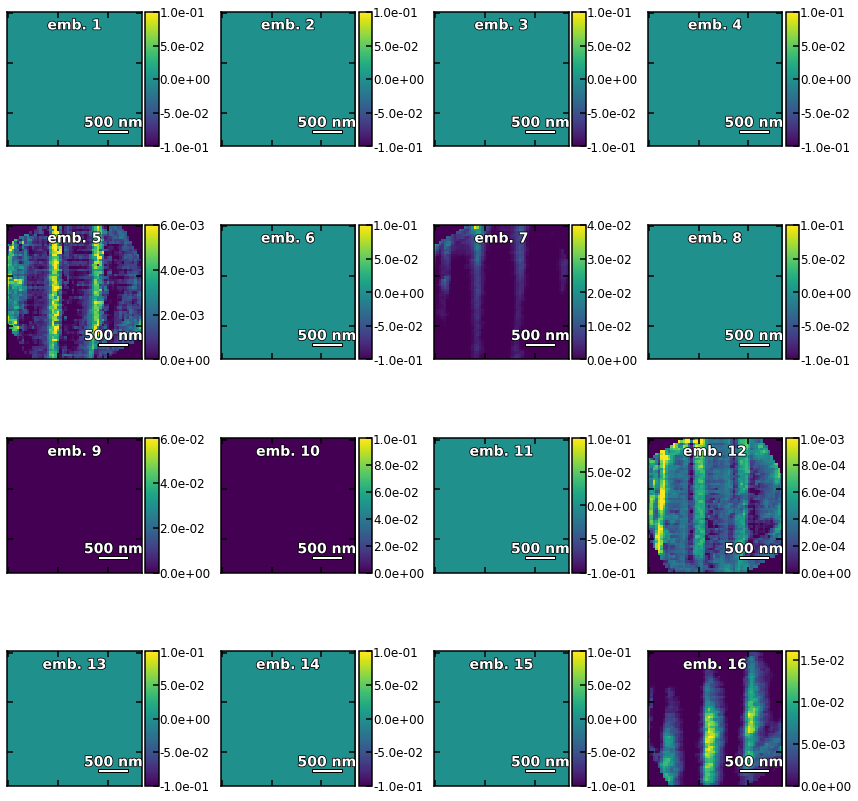

In [70]:
# defines the ranges for the images
ranges = [0, 0, 0, 0, 6e-3,
          0, 4e-2, 0, 6e-2, 1e-1,
          0, 1e-3, 0, 0, 0, 1.6e-2]

# plots the embedding maps
_ = viz.plot.embedding_maps(
    resonance_embeddings,
    printing,
    plot_format,
    folder_resonance_autoencoder,
    filename='./Resonance_embeddings',
    ranges=ranges)

**Figure J44 | Output of low dimensional layer obtained from the resonance autoencoder.**

### Plot Embedding and Line Trace

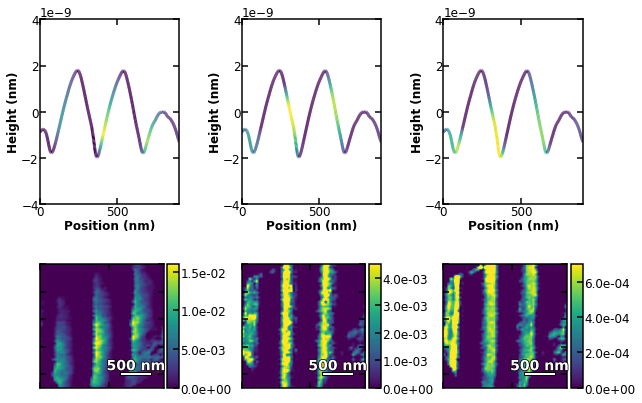

In [71]:
# collects the c/a clustering results
cluster_ca = machine_learning['clustering']['piezoresponse'][1]

# makes a copy of the embeddings
embedding_c = np.copy(resonance_embeddings)
embedding_a = np.copy(resonance_embeddings)

# splits the embeddings for the c and a domains
embedding_c[np.where(cluster_ca == 1)] = 0
embedding_a[np.where(cluster_ca == 0)] = 0

# rotates and crops the topography image
crop_topo, scale = util.core.rotate_and_crop(
    np.flipud(imported['data']['HeightFinal'].reshape(1024, 1024).T))

# defines the embedding ranges for the images
ranges = [0, 0, 0, 0, 6e-3,
          0, 4e-2, 0, 6e-2, 1e-1,
          0, 1e-3, 0, 0, 0, 1.6e-2]

# creates the figures and axes in a pretty way
fig, ax = viz.format.layout_fig(6, mod=3)

# plots the embedding superimposed on the line trace
viz.plot.embedding_line_trace(
    ax,
    0,
    crop_topo,
    embedding_c[:, 15],
    [0, 1.6e-2],
    plot_format)

viz.plot.embedding_line_trace(
    ax,
    1,
    crop_topo,
    embedding_a[:, 4],
    [0, 4.5e-3],
    plot_format)

viz.plot.embedding_line_trace(
    ax,
    2,
    crop_topo,
    embedding_a[:, 11],
    [0, 7e-4],
    plot_format)

plt.tight_layout(pad=1)

# saves the figure
util.file.savefig(
    folder_resonance_autoencoder +
    '/embedding_and_topography',
    printing)

**Figure J45 | Plots of selected embedding maps from piezoelectric autoencoder superimposed on average topography.**

### Exports Training Images

Exports low dimensional layer computed after each epoch (with improvement) during training. This allows the visualization of the effect of L${_1}$ regularization.

In [72]:
# selects to export training images
# note this take a long time (1-2 hours)
export_training_images = False

if export_training_images:
    if np.int(io_transfer.get_size(model_folder) / 1e8) > 1:
        viz.plot.training_images(
            resonance_model,
            data,
            model_folder,
            printing,
            plot_format,
            folder_resonance_autoencoder_training_movie,
            data_type='resonance')

        if printing['movies']:
            # Script to making movie
            util.file.make_movie(
                'resonance_training_movie',
                folder_resonance_autoencoder_training_movie,
                './',
                'png',
                10,
                output_format='mp4')

### Make Generator Movie

Makes a movie where the magnitude of the embedding is manipulated and the decoder is used to generate the piezoresponse

In [73]:
if printing['movies']:

    # collects the c/a c
    cluster_ca = machine_learning['clustering']['piezoresponse'][1]

    # makes a copy of the resonance embeddings
    embedding_c = np.copy(resonance_embeddings)
    embedding_a = np.copy(resonance_embeddings)

    # extracts the embeddings for the c/a regions
    embedding_c[np.where(cluster_ca == 1)] = 0
    embedding_a[np.where(cluster_ca == 0)] = 0

    # defines the embedding ranges for the images
    ranges_a = [0, 0, 0, 0, 5e-3,
                0, 4e-2, 0, 6e-2, 1e-1,
                0, 7e-4, 0, 0, 0, 1.6e-2]

    ranges_c = [0, 0, 0, 0, 2e-3,
                0, 4e-2, 0, 6e-2, 1e-1,
                0, .7e-3, 0, 0, 0, 1.6e-2]

    # selects the embeding maps to plot
    index_a = [4, 6, 11]
    index_c = [4, 11, 15]

    # selects the number of images (embedding levels) to make
    number = 100

    # selects the number of points to average the embedding between
    averaging_number = 50

    # generates the embedding images
    _ = viz.plot.resonance_generator_movie(
        resonance_model,
        index_c,
        index_a,
        embedding_c, data['raw']['voltage'],
        embedding_a,
        ranges_c,
        ranges_a,
        number,
        averaging_number,
        resonance_decoder,
        plot_format,
        printing,
        folder_resonance_autoencoder_movie,
        graph_layout=[12, 3])

    # Script to making movie
    util.file.make_movie(
        'Resonance_Generator_movie',
        folder_resonance_autoencoder_movie,
        './',
        'png',
        10,
        output_format='mp4',
        reverse=True)

### Autoencoder Generator

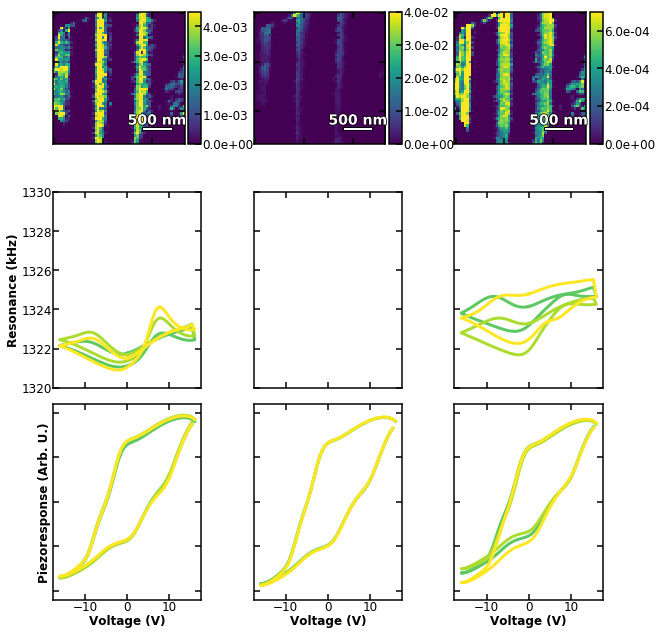

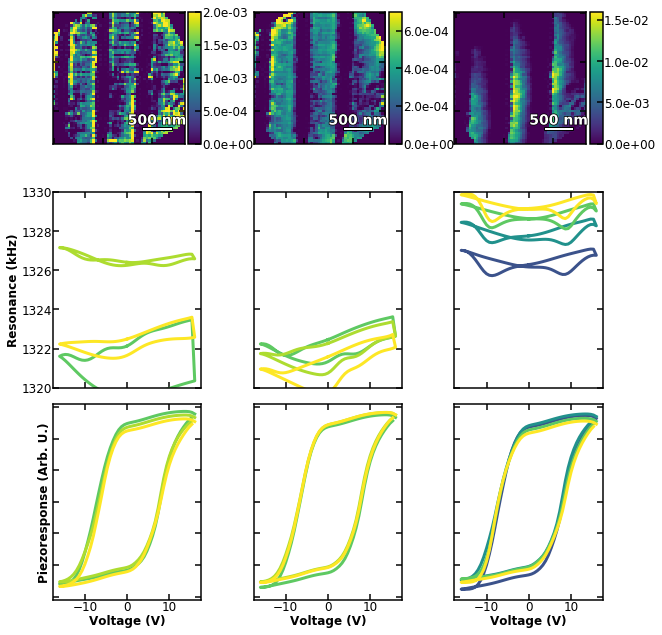

In [74]:
# defines the ranges for the images
ranges = [0, 0, 0, 0, 4.5e-3,
          0, 4e-2, 0, 6e-2, 1e-1,
          0, 7e-4, 0, 0, 0,
          1.6e-2]

# selects the embedding maps to plot
index_a = [4, 6, 11]
index_c = [4, 11, 15]

# selects the number of curves to plot
number = 8

# selects the number of pixels to average
averaging_number = 50

# selects a subset of the generated plots
plot_subselect = [[7, 6, 5],
                  [7, 6, 5],
                  [7, 6, 5]]

# set the scales of the axes
scales = [[1320, 1330],
          [-1.1, 1.1]]

# plots the generated curves for the a domains
viz.plot.resonance_generator(
    resonance_decoder,
    piezoresponse_decoder,
    index_a,
    embedding_a,
    ranges,
    number,
    averaging_number,
    plot_subselect,
    piezoresponse_embeddings,
    data['raw']['voltage'],
    data['sg_filtered']['resonance'],
    plot_format,
    printing,
    folder_resonance_autoencoder,
    scales,
    name_prefix='a_domains')


# sets the embedding ranges for the c domains
ranges = [0, 0, 0, 0, 2e-3,
          0, 4e-2, 0, 6e-2, 1e-1,
          0, .7e-3, 0, 0, 0,
          1.6e-2]

# selects a subset of the generated plots
plot_subselect = [[7, 6, 5], [7, 6, 5], [7, 5, 3, 1]]
# set the scales of the axes
scales = [[1320, 1330], [-1.55, 1.55]]

# plots the generated curves for the a domains
viz.plot.resonance_generator(
    resonance_decoder,
    piezoresponse_decoder,
    index_c,
    embedding_c,
    ranges,
    number,
    averaging_number,
    plot_subselect,
    piezoresponse_embeddings,
    data['raw']['voltage'],
    data['sg_filtered']['resonance'],
    plot_format,
    printing,
    folder_resonance_autoencoder,
    scales,
    name_prefix='c_domains')

**Figure J45 | Plots of selected embedding maps from resonance autoencoder.** 
Top shows embedding map, middle shows generated resonance hysteresis loop, bottom shows generated piezoelectric hysteresis loop obtained when varying each embedding. The color of the hysteresis loops reflects the colors in the map

# Phase Field

In [22]:
# sets the position where the tip is located
tip_positions = {'tip1': dict(pos=[42, 64, 20]),
                 'tip2': dict(pos=[50, 64, 20]),
                 'tip3': dict(pos=[62, 64, 20]),
                 'tip4': dict(pos=[72, 64, 20]),
                 'tip5': dict(pos=[74, 64, 20])}

# sets the scale limits for the graphs
clim = {'Polarization Z': [-1, 1],
        'Landau Energy': [-10e7, 10e7],
        'Elastic Energy': [-10e7, 10e7],
        'Electrostatic Energy': [-10e7, 10e7],
        'Gradient Energy': [-10e7, 10e7],
        'Total Energy': [-10e7, 10e7]}

# sets the information of the region to s6ho
graph_info = dict(top=20,
                  y_cut=64,
                  x_lim=[120, 360],
                  y_lim=[0, 100],
                  clim=clim)

# collection of information used for plotting the phase feild results
Phase_field_information = {'tips': ['tip1',
                                    'tip2',
                                    'tip3',
                                    'tip4',
                                    'tip5'],
                           'folder': dict(time_series='./Raw_Data/Phase_Field/Polarization/data-PEloop/',
                                          polarization='./Raw_Data/Phase_Field/Polarization/',
                                          energy='./Raw_Data/Phase_Field/energy/'),
                           'time_step': [60, 0, 20],
                           'tip_positions': tip_positions,
                           'graph_info': graph_info,
                           'labels': ['Polarization Z',
                                      'Landau Energy',
                                      'Elastic Energy',
                                      'Electrostatic Energy',
                                      'Gradient Energy',
                                      'Total Energy'],
                           'output_folder': folder_phase_field}

## Phase Field Switching Images

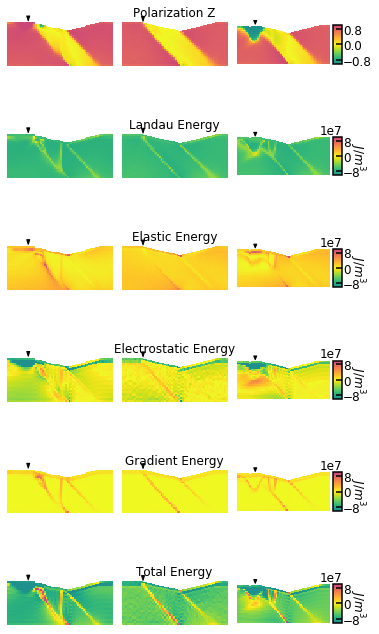

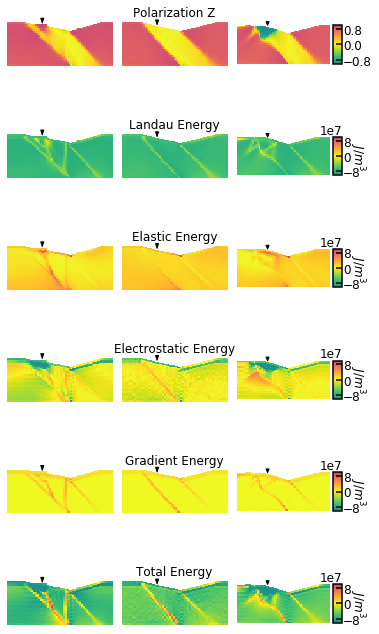

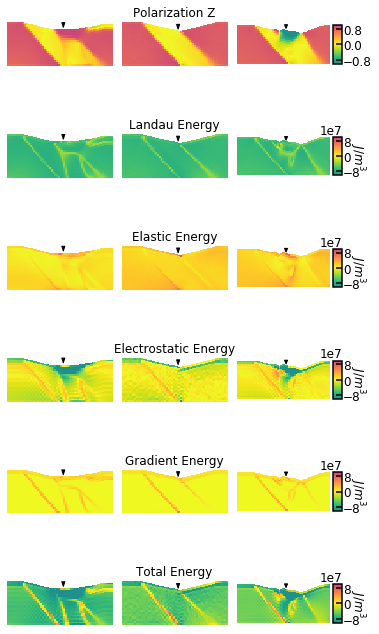

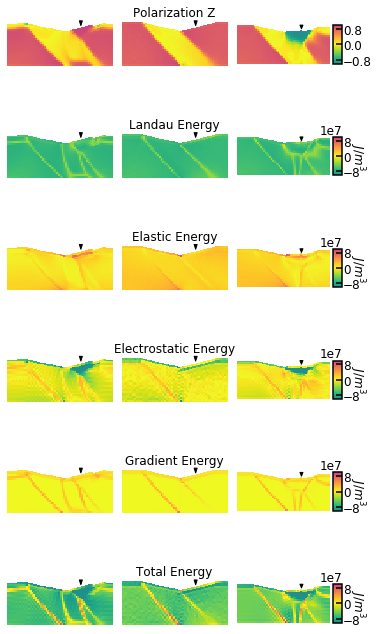

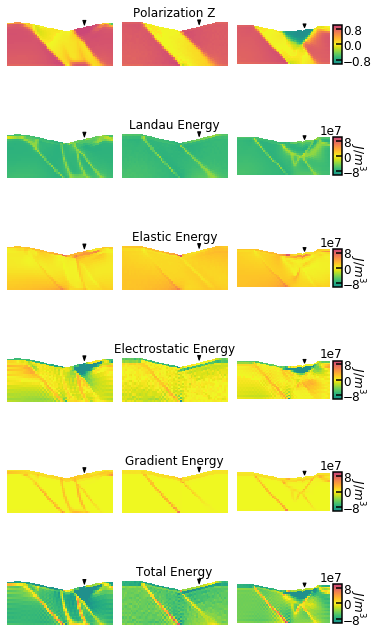

In [23]:
# plots the phase field results
viz.phase_field.phase_field_switching(Phase_field_information, printing)

**Figure J46 | Phase-field simulations under local tip bias.** Maps show the polarization and various contributions to the energy at various tip positions. Maps show the switching under negative bias (left), initial state (center), positive bias (right). 

In [ ]:
if printing['movies']:
    # exports all phase field images to create movie
    _ = viz.phase_field.movie(Phase_field_information, printing)

## Makes Movies

In [ ]:
if printing['movies']:
    for i, tip in enumerate(Phase_field_information['tips']):
        util.file.make_movie('Switching_movie_' + tip,
                             folder_phase_field + '/movie/' + tip,
                             folder_phase_field + '/movie/',
                             'png',
                             5, output_format='gif')

## Phase Field Hysteresis Loops

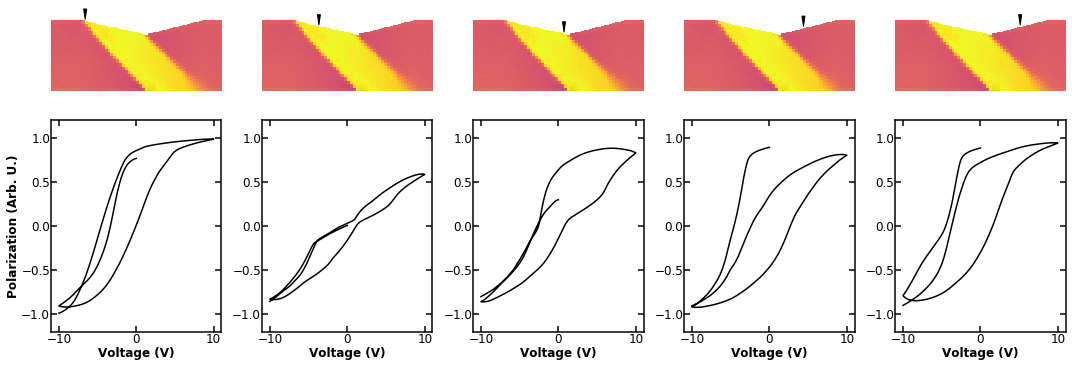

In [24]:
viz.phase_field.phase_field_hysteresis(Phase_field_information, printing)

**Figure J47 | Phase-field simulations under local tip bias.** Plots show the extracted ferroelectric hysteresis loops at various tip positions.